In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


Data Import and Preparation

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Import data

In [ ]:
train = pd.read_csv('/content/MyDrive/MyDrive/Data-Science-Capstone-Projects/Project_1/Project 1/train.csv')
test = pd.read_csv('/content/MyDrive/MyDrive/Data-Science-Capstone-Projects/Project_1/Project 1/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(27321, 80)
(11709, 80)


In [ ]:
train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [ ]:
test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [ ]:
train.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074017    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027488      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [ ]:
test.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   11709.000000      0.0   11709.0  11709.000000  11709.000000   
mean   257525.004783      NaN     140.0     85.710650     28.489196   
std     21466.372658      NaN       0.0     99.304334     16.607262   
min    220336.000000      NaN     140.0      1.000000      1.000000   
25%    238819.000000      NaN     140.0     29.000000     13.000000   
50%    257651.000000      NaN     140.0     61.000000     28.000000   
75%    276300.000000      NaN     140.0    109.000000     42.000000   
max    294333.000000      NaN     140.0    810.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  11709.000000  11709.000000  11709.000000  11709.000000  1.170900e+04   
mean   50123.418396    593.598514     37.405491    -91.340229  1.095500e+08   
std    29775.134038    232.074263      5.625904     16.407818  7.624940e+08   
min      601.000000    201.000000     17.965835   -166.770979  8.299000e+03   
25%    25570.000000    404.000000     33.919813    -97.816561  1.718660e+06   
50%    47362.000000    612.000000     38.618093    -86.643344  4.835000e+06   
75%    77406.000000    787.000000     41.232973    -79.697311  3.204540e+07   
max    99929.000000    989.000000     64.804269    -65.695344  5.520166e+10   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     11613.000000       11613.000000      11613.000000   
mean   ...        40.111999          40.131864         22.148145   
std    ...         5.851192           7.972026          2.554907   
min    ...        15.360240          12.833330          0.737110   
25%    ...        36.729210          34.750000         21.270920   
50%    ...        40.196960          40.333330         22.472990   
75%    ...        43.496490          45.333330         23.549450   
max    ...        90.107940          90.166670         29.626680   

       female_age_sample_weight  female_age_samples       pct_own  \
count              11613.000000        11613.000000  11587.000000   
mean                 550.411243         2233.003186      0.634194   
std                  280.992521         1072.017063      0.232232   
min                    0.251910            3.000000      0.000000   
25%                  363.225840         1499.000000      0.492500   
50%                  509.103610         2099.000000      0.687640   
75%                  685.883910         2800.000000      0.815235   
max                 4145.557870        15466.000000      1.000000   

            married   married_snp     separated      divorced  
count  11625.000000  11625.000000  11625.000000  11625.000000  
mean       0.505632      0.047960      0.019346      0.099191  
std        0.139774      0.038693      0.021428      0.048525  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.422020      0.020890      0.004500      0.064590  
50%        0.525270      0.038680      0.013870      0.094350  
75%        0.605660      0.065340      0.027910      0.128400  
max        1.000000      0.714290      0.714290      0.362750  

[8 rows x 74 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

Figure out the primary key and look for the requirement of indexing

In [ ]:
train.set_index(keys=['UID'],inplace=True)
test.set_index(keys=['UID'],inplace=True)


Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [ ]:
missing_train_values = round(train.isnull().sum()*100/len(train),2)
missing_train_values_t = pd.DataFrame(missing_train_values,columns=['Percentage_of_missing_values'])
missing_train_values_t.sort_values(by=['Percentage_of_missing_values'],inplace=True,ascending=False)

In [ ]:
missing_train_values_t[missing_train_values_t['Percentage_of_missing_values']>0]

Percentage_of_missing_values
BLOCKID                                            100.00
hc_samples                                           2.20
hc_mean                                              2.20
hc_median                                            2.20
hc_stdev                                             2.20
hc_sample_weight                                     2.20
hc_mortgage_mean                                     2.10
hc_mortgage_stdev                                    2.10
hc_mortgage_sample_weight                            2.10
hc_mortgage_samples                                  2.10
hc_mortgage_median                                   2.10
home_equity_second_mortgage                          1.67
home_equity                                          1.67
debt                                                 1.67
second_mortgage_cdf                                  1.67
home_equity_cdf                                      1.67
debt_cdf                                             1.67
second_mortgage                                      1.67
rent_gt_15                                           1.15
rent_gt_50                                           1.15
rent_gt_40                                           1.15
rent_gt_35                                           1.15
rent_gt_30                                           1.15
rent_gt_25                                           1.15
rent_gt_20                                           1.15
rent_samples                                         1.15
rent_gt_10                                           1.15
rent_sample_weight                                   1.15
rent_stdev                                           1.15
rent_median                                          1.15
rent_mean                                            1.15
family_median                                        1.09
family_samples                                       1.09
family_sample_weight                                 1.09
family_stdev                                         1.09
family_mean                                          1.09
hi_stdev                                             0.98
hi_median                                            0.98
hi_sample_weight                                     0.98
hi_mean                                              0.98
pct_own                                              0.98
hi_samples                                           0.98
hs_degree_female                                     0.82
female_age_samples                                   0.75
female_age_sample_weight                             0.75
female_age_stdev                                     0.75
female_age_median                                    0.75
female_age_mean                                      0.75
hs_degree_male                                       0.73
separated                                            0.70
married_snp                                          0.70
married                                              0.70
hs_degree                                            0.70
divorced                                             0.70
male_age_stdev                                       0.69
male_age_samples                                     0.69
male_age_mean                                        0.69
male_age_median                                      0.69
male_age_sample_weight                               0.69

In [ ]:
missing_test_values = round(test.isnull().sum()*100/len(test),2)
missing_test_values_t = pd.DataFrame(missing_test_values,columns=['Percentage_of_missing_values'])
missing_test_values_t.sort_values(by=['Percentage_of_missing_values'],inplace=True,ascending=False)

In [ ]:
 missing_test_values_t[missing_test_values_t['Percentage_of_missing_values']>0]

Percentage_of_missing_values
BLOCKID                                            100.00
hc_samples                                           2.48
hc_mean                                              2.48
hc_median                                            2.48
hc_stdev                                             2.48
hc_sample_weight                                     2.48
hc_mortgage_mean                                     2.29
hc_mortgage_stdev                                    2.29
hc_mortgage_sample_weight                            2.29
hc_mortgage_samples                                  2.29
hc_mortgage_median                                   2.29
home_equity_second_mortgage                          1.88
home_equity                                          1.88
debt                                                 1.88
second_mortgage_cdf                                  1.88
home_equity_cdf                                      1.88
debt_cdf                                             1.88
second_mortgage                                      1.88
rent_gt_20                                           1.27
rent_gt_50                                           1.27
rent_gt_40                                           1.27
rent_gt_35                                           1.27
rent_gt_30                                           1.27
rent_gt_25                                           1.27
rent_gt_10                                           1.27
rent_gt_15                                           1.27
rent_samples                                         1.26
rent_sample_weight                                   1.26
rent_stdev                                           1.26
rent_median                                          1.26
rent_mean                                            1.26
family_median                                        1.16
family_samples                                       1.16
family_sample_weight                                 1.16
family_stdev                                         1.16
family_mean                                          1.16
hi_stdev                                             1.04
hi_median                                            1.04
pct_own                                              1.04
hi_mean                                              1.04
hi_sample_weight                                     1.04
hi_samples                                           1.04
hs_degree_female                                     0.90
female_age_mean                                      0.82
female_age_sample_weight                             0.82
female_age_median                                    0.82
female_age_stdev                                     0.82
female_age_samples                                   0.82
hs_degree_male                                       0.76
hs_degree                                            0.73
married_snp                                          0.72
male_age_samples                                     0.72
male_age_sample_weight                               0.72
male_age_stdev                                       0.72
male_age_median                                      0.72
male_age_mean                                        0.72
married                                              0.72
separated                                            0.72
divorced                                             0.72

BLOCKID can be dropped, since it is 100%missing values

In [ ]:
train.var()==0

BLOCKID        False
SUMLEVEL        True
COUNTYID       False
STATEID        False
zip_code       False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 73, dtype: bool

SUMLEVEL can be dropped due to no variance

In [ ]:
train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)
test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [ ]:
for column in train:
  if train[column].dtype == 'object':
    print(f'{column}: {train[column].isnull().sum()}') # Object column doesn't have any null values

state: 0
state_ab: 0
city: 0
place: 0
type: 0
primary: 0


In [ ]:
for column in train:
  if train[column].dtype != 'object':
    print(f'{column}: {train[column].isnull().sum()}')# numerical column contains null values

COUNTYID: 0
STATEID: 0
zip_code: 0
area_code: 0
lat: 0
lng: 0
ALand: 0
AWater: 0
pop: 0
male_pop: 0
female_pop: 0
rent_mean: 314
rent_median: 314
rent_stdev: 314
rent_sample_weight: 314
rent_samples: 314
rent_gt_10: 314
rent_gt_15: 314
rent_gt_20: 314
rent_gt_25: 314
rent_gt_30: 314
rent_gt_35: 314
rent_gt_40: 314
rent_gt_50: 314
universe_samples: 0
used_samples: 0
hi_mean: 268
hi_median: 268
hi_stdev: 268
hi_sample_weight: 268
hi_samples: 268
family_mean: 298
family_median: 298
family_stdev: 298
family_sample_weight: 298
family_samples: 298
hc_mortgage_mean: 573
hc_mortgage_median: 573
hc_mortgage_stdev: 573
hc_mortgage_sample_weight: 573
hc_mortgage_samples: 573
hc_mean: 600
hc_median: 600
hc_stdev: 600
hc_samples: 600
hc_sample_weight: 600
home_equity_second_mortgage: 457
second_mortgage: 457
home_equity: 457
debt: 457
second_mortgage_cdf: 457
home_equity_cdf: 457
debt_cdf: 457
hs_degree: 190
hs_degree_male: 200
hs_degree_female: 223
male_age_mean: 189
male_age_median: 189
male_age_

In [ ]:
for column in test:
  if test[column].dtype == 'object':
    print(f'{column}: {test[column].isnull().sum()}') # Object column doesn't have any null values

state: 0
state_ab: 0
city: 0
place: 0
type: 0
primary: 0


In [ ]:
for column in test:
  if test[column].dtype != 'object':
    print(f'{column}: {test[column].isnull().sum()}')#numerical column contains null values

COUNTYID: 0
STATEID: 0
zip_code: 0
area_code: 0
lat: 0
lng: 0
ALand: 0
AWater: 0
pop: 0
male_pop: 0
female_pop: 0
rent_mean: 148
rent_median: 148
rent_stdev: 148
rent_sample_weight: 148
rent_samples: 148
rent_gt_10: 149
rent_gt_15: 149
rent_gt_20: 149
rent_gt_25: 149
rent_gt_30: 149
rent_gt_35: 149
rent_gt_40: 149
rent_gt_50: 149
universe_samples: 0
used_samples: 0
hi_mean: 122
hi_median: 122
hi_stdev: 122
hi_sample_weight: 122
hi_samples: 122
family_mean: 136
family_median: 136
family_stdev: 136
family_sample_weight: 136
family_samples: 136
hc_mortgage_mean: 268
hc_mortgage_median: 268
hc_mortgage_stdev: 268
hc_mortgage_sample_weight: 268
hc_mortgage_samples: 268
hc_mean: 290
hc_median: 290
hc_stdev: 290
hc_samples: 290
hc_sample_weight: 290
home_equity_second_mortgage: 220
second_mortgage: 220
home_equity: 220
debt: 220
second_mortgage_cdf: 220
home_equity_cdf: 220
debt_cdf: 220
hs_degree: 85
hs_degree_male: 89
hs_degree_female: 105
male_age_mean: 84
male_age_median: 84
male_age_stde

Deleting the rows which contain null values.Because most of the column null values percentage are not higher than 2.5%.So it's safe to delete these rows



In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any().sum()

0

In [ ]:
train.shape

(26585, 77)

In [ ]:
test.dropna(inplace=True)

In [ ]:
test.isnull().any().sum()

0

In [ ]:
test.shape

(11355, 77)

#Exploratory Data Analysis(EDA)

#Perform debt analysis. You may take the following steps:

 a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [ ]:
train.nlargest(2500, ['second_mortgage', 'pct_own'])

COUNTYID  STATEID           state state_ab          city  \
UID                                                                
264403        31       34      New Jersey       NJ       Passaic   
289712       147       51        Virginia       VA     Farmville   
222830        13        4         Arizona       AZ    Scottsdale   
251185        27       25   Massachusetts       MA     Worcester   
278178       101       42    Pennsylvania       PA  Philadelphia   
...          ...      ...             ...      ...           ...   
245335         3       18         Indiana       IN    Fort Wayne   
260417        81       37  North Carolina       NC    High Point   
286364       257       48           Texas       TX      Crandall   
287041       397       48           Texas       TX    Royse City   
225435        37        6      California       CA   Los Angeles   

                      place     type primary  zip_code  area_code  ...  \
UID                                                                ...   
264403        Garfield City     City   tract      7055        973  ...   
289712            Farmville     Town   tract     23901        434  ...   
222830           Tempe City      CDP   tract     85257        480  ...   
251185       Worcester City     City   tract      1610        508  ...   
278178           Millbourne  Borough   tract     19104        215  ...   
...                     ...      ...     ...       ...        ...  ...   
245335      Fort Wayne City     City   tract     46814        260  ...   
260417            Jamestown  Village   tract     27265        336  ...   
286364                Talty     Town   tract     75114        972  ...   
287041            Fate City     Town   tract     75189        972  ...   
225435  South Pasadena City     City   tract     90042        323  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
264403         26.57222           25.66667          19.34716   
289712         19.58762           19.16667           4.00258   
222830         31.91429           30.83333          14.45269   
251185         30.60147           26.16667          19.21553   
278178         22.42708           21.08333           7.39823   
...                 ...                ...               ...   
245335         36.26617           37.66667          22.54754   
260417         37.43896           35.00000          21.50541   
286364         32.84647           32.75000          20.34275   
287041         32.19408           33.41667          20.08021   
225435         32.26462           30.83333          20.41615   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
264403                 553.14428              2526.0  0.01157  0.32288   
289712                 673.39577              1124.0  0.62069  0.03612   
222830                 229.39846               981.0  0.05660  0.21531   
251185                 262.09529               994.0  0.20247  0.37844   
278178                2280.04214              3446.0  0.05041  0.07505   
...                          ...                 ...      ...      ...   
245335                 750.45868              3351.0  0.87611  0.85458   
260417                 449.31863              2081.0  0.44992  0.56118   
286364                 965.04813              4358.0  0.89705  0.64629   
287041                1130.12241              5144.0  0.74929  0.59892   
225435                 411.54960              1758.0  0.29012  0.44686   

        married_snp  separated  divorced  
UID                                       
264403      0.04792    0.00913   0.04678  
289712      0.01806    0.01806   0.00000  
222830      0.10204    0.07347   0.20816  
251185      0.11976    0.09341   0.10539  
278178      0.03665    0.00000   0.01378  
...             ...        ...       ...  
245335      0.00632 

In [ ]:
train_2500 = train[['state','lat','lng','second_mortgage', 'pct_own', 'place', 'state', 'city', 'COUNTYID', 'STATEID', 'home_equity','home_equity_second_mortgage','debt','hi_median','family_median']].nlargest(2500, ['second_mortgage', 'pct_own'])

In [ ]:
train_2500

state        lat         lng  second_mortgage  pct_own  \
UID                                                                       
264403      New Jersey  40.867944  -74.114633          0.60870  0.01157   
289712        Virginia  37.297357  -78.396452          0.50000  0.62069   
222830         Arizona  33.458658 -111.955104          0.43750  0.05660   
251185   Massachusetts  42.254262  -71.800347          0.43363  0.20247   
278178    Pennsylvania  39.952954  -75.202767          0.39024  0.05041   
...                ...        ...         ...              ...      ...   
245335         Indiana  41.074478  -85.305983          0.06880  0.87611   
260417  North Carolina  36.049499  -79.950157          0.06880  0.44992   
286364           Texas  32.685568  -96.421242          0.06879  0.89705   
287041           Texas  32.942220  -96.344575          0.06879  0.74929   
225435      California  34.115176 -118.189852          0.06875  0.29012   

                      place           state          city  COUNTYID  STATEID  \
UID                                                                            
264403        Garfield City      New Jersey       Passaic        31       34   
289712            Farmville        Virginia     Farmville       147       51   
222830           Tempe City         Arizona    Scottsdale        13        4   
251185       Worcester City   Massachusetts     Worcester        27       25   
278178           Millbourne    Pennsylvania  Philadelphia       101       42   
...                     ...             ...           ...       ...      ...   
245335      Fort Wayne City         Indiana    Fort Wayne         3       18   
260417            Jamestown  North Carolina    High Point        81       37   
286364                Talty           Texas      Crandall       257       48   
287041            Fate City           Texas    Royse City       397       48   
225435  South Pasadena City      California   Los Angeles        37        6   

        home_equity  home_equity_second_mortgage     debt  hi_median  \
UID                                                                    
264403      0.00000                      0.00000  0.60870    28053.0   
289712      0.00000                      0.00000  0.50000    23236.0   
222830      0.43750                      0.43750  0.54688    40883.0   
251185      0.43363                      0.43363  0.84956    29037.0   
278178      0.21951                      0.00000  0.93902    12881.0   
...             ...                          ...      ...        ...   
245335      0.17017                      0.06880  0.79569   104418.0   
260417      0.10558                      0.06880  0.64887    57928.0   
286364      0.08762                      0.06764  0.88509    77532.0   
287041      0.08683                      0.06879  0.81502    81956.0   
225435      0.21875                      0.03125  0.80938    49098.0   

        family_median  
UID                    
264403        29340.0  
289712        59954.0  
222830        59657.0  
251185        40476.0  
278178        50622.0  
...               ...  
245335       111437.0  
260417        68019.0  
286364        80908.0  
287041        87204.0  
225435        50849.0  

[2500 rows x 15 columns]

In [ ]:
train_2500[train_2500['pct_own']>0.1].head()

state        lat        lng  second_mortgage  pct_own  \
UID                                                                     
289712       Virginia  37.297357 -78.396452          0.50000  0.62069   
251185  Massachusetts  42.254262 -71.800347          0.43363  0.20247   
269323       New York  40.751809 -73.853582          0.31818  0.15618   
251324       Maryland  39.127273 -76.635265          0.30212  0.22380   
235788        Florida  28.029063 -82.495395          0.28972  0.11618   

                  place          state         city  COUNTYID  STATEID  \
UID                                                                      
289712        Farmville       Virginia    Farmville       147       51   
251185   Worcester City  Massachusetts    Worcester        27       25   
269323     Harbor Hills       New York       Corona        81       36   
251324      Glen Burnie       Maryland  Glen Burnie         3       24   
235788  Egypt Lake-leto        Florida        Tampa        57       12   

        home_equity  home_equity_second_mortgage     debt  hi_median  \
UID                                                                    
289712      0.00000                      0.00000  0.50000    23236.0   
251185      0.43363                      0.43363  0.84956    29037.0   
269323      0.40341                      0.31818  0.78409    46106.0   
251324      0.35689                      0.27739  0.87633    50164.0   
235788      0.38785                      0.28972  0.78972    38340.0   

        family_median  
UID                    
289712        59954.0  
251185        40476.0  
269323        40462.0  
251324        50705.0  
235788        39980.0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scattergeo(
    lat = train_2500['lat'],
    lon = train_2500['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

In [ ]:
train['bad_debt'] = train['second_mortgage']+train['home_equity']-train['home_equity_second_mortgage']
test['bad_debt'] = test['second_mortgage']+test['home_equity']-test['home_equity_second_mortgage']

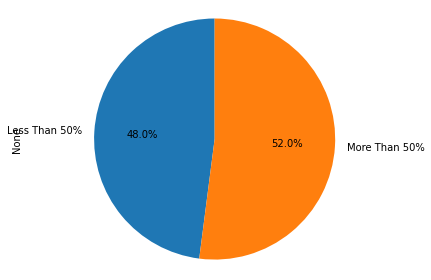

In [ ]:
train['bins'] = pd.cut(train['bad_debt'],bins=[0,0.1,1.5], labels=["Less Than 50%","More Than 50%"])
train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
train['city'].value_counts().to_frame()

city
Chicago                  286
Brooklyn                 261
Los Angeles              219
Houston                  213
Philadelphia             160
San Antonio              138
Baltimore                128
Las Vegas                123
Phoenix                  114
Miami                    105
Detroit                   99
Bronx                     98
Columbus                  95
Dallas                    95
Springfield               92
Indianapolis              90
San Diego                 89
Milwaukee                 88
Jacksonville              85
Washington                85
New York                  79
Louisville                76
San Francisco             76
Charlotte                 76
Rochester                 75
Portland                  74
Pittsburgh                74
Kansas City               72
Cleveland                 70
Cincinnati                69
New Orleans               66
Tucson                    66
Atlanta                   65
Denver                    64
Tampa                     64
Austin                    63
Richmond                  62
San Jose                  61
Oklahoma City             60
Omaha                     60
St Louis                  59
Fort Worth                58
Lexington                 57
Sacramento                56
El Paso                   56
Orlando                   55
Greenville                55
Seattle                   53
Albuquerque               51
Aurora                    51
Memphis                   50
Tulsa                     50
Newark                    49
Oakland                   49
Arlington                 48
Columbia                  48
Minneapolis               47
Madison                   47
Jackson                   47
Nashville                 46
Alexandria                44
San Juan                  43
Glendale                  42
Wilmington                42
Knoxville                 40
Fayetteville              39
Long Beach                39
Lincoln                   38
Lakewood                  38
Decatur                   37
Mesa                      37
Raleigh                   37
Lancaster                 37
Colorado Springs          37
Henderson                 36
Fresno                    36
Canton                    36
Albany                    36
Salt Lake City            36
Toledo                    36
Honolulu                  36
Bloomington               35
Salem                     35
Buffalo                   34
Monroe                    34
Gainesville               34
Bakersfield               34
Warren                    34
Fairfield                 34
Fort Wayne                32
Spokane                   32
Vancouver                 32
Virginia Beach            32
Franklin                  31
Grand Rapids              31
Pasadena                  31
West Palm Beach           31
Marietta                  31
Riverside                 31
Dayton                    31
Auburn                    30
Des Moines                30
Baton Rouge               30
Manchester                30
Peoria                    29
Norfolk                   29
Wichita                   29
Staten Island             29
Charleston                29
Lafayette                 29
Troy                      28
Danville                  28
Jamaica                   27
Little Rock               27
Birmingham                27
Fremont                   27
Florence                  27
Savannah                  27
Rockford                  26
Burlington                26
St Petersburg             26
Durham                    26
Marion                    26
Saint Paul                25
Tacoma                    25
Clinton                   25
Greensboro                25
Bayamon                   25
Westminster               24
Huntsville                24
Clearwater                24
Pensacola                 24
Lakeland                  24
Hampton                   24
Macon                     24
Akron                     23
Naples                    23
Shawnee Mission       

Since it is difficult to show all locations, without compromising readability, I have limited my selection to Top 10 cities

In [ ]:
train['city'].value_counts()[:10].index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

In [ ]:
Top10_cities=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia','San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']

In [ ]:
bplot = train[train['city'].isin(Top10_cities)]

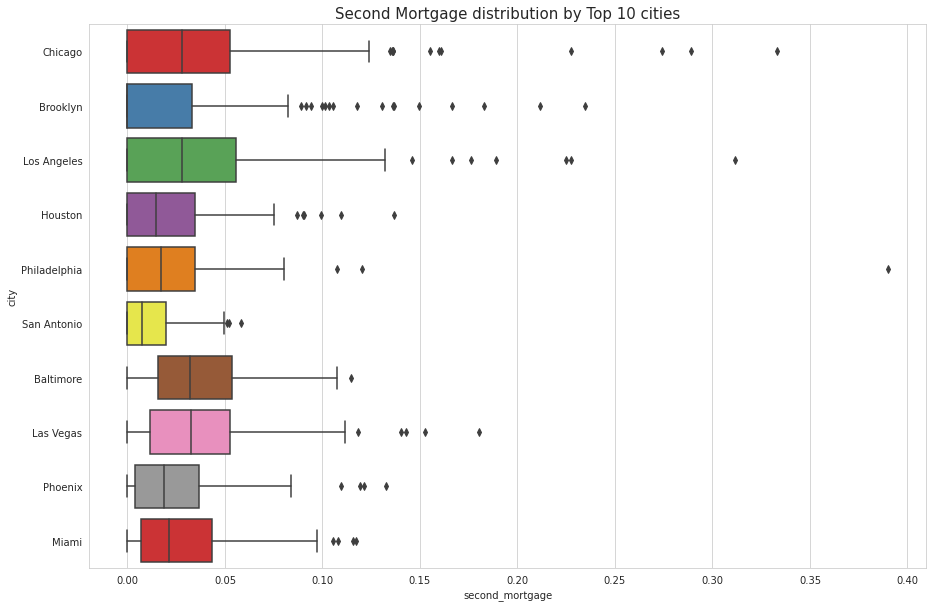

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=bplot,x='second_mortgage', y='city',palette="Set1",order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia','San Antonio',
                      'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Second Mortgage distribution by Top 10 cities', fontsize = 15)
plt.show()

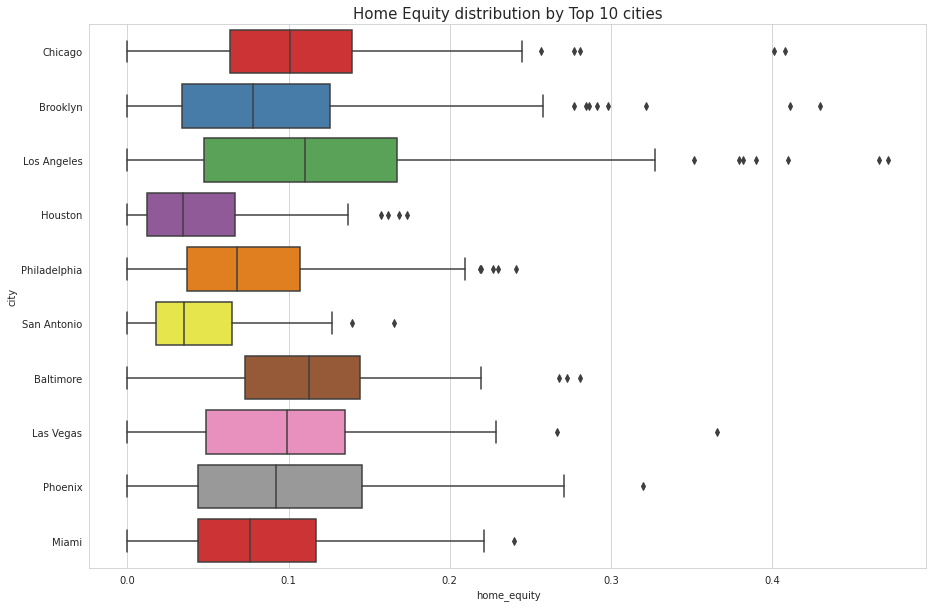

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=bplot,x='home_equity', y='city',palette="Set1",order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia','San Antonio',
                      'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Home Equity distribution by Top 10 cities', fontsize = 15)
plt.show()

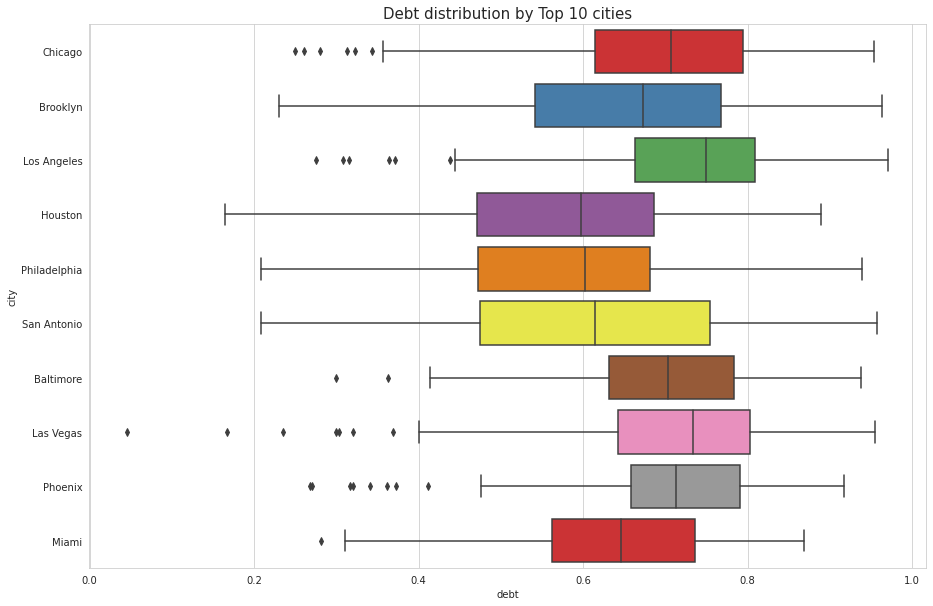

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=bplot,x='debt', y='city',palette="Set1",order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia','San Antonio',
                      'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Debt distribution by Top 10 cities', fontsize = 15)
plt.show()

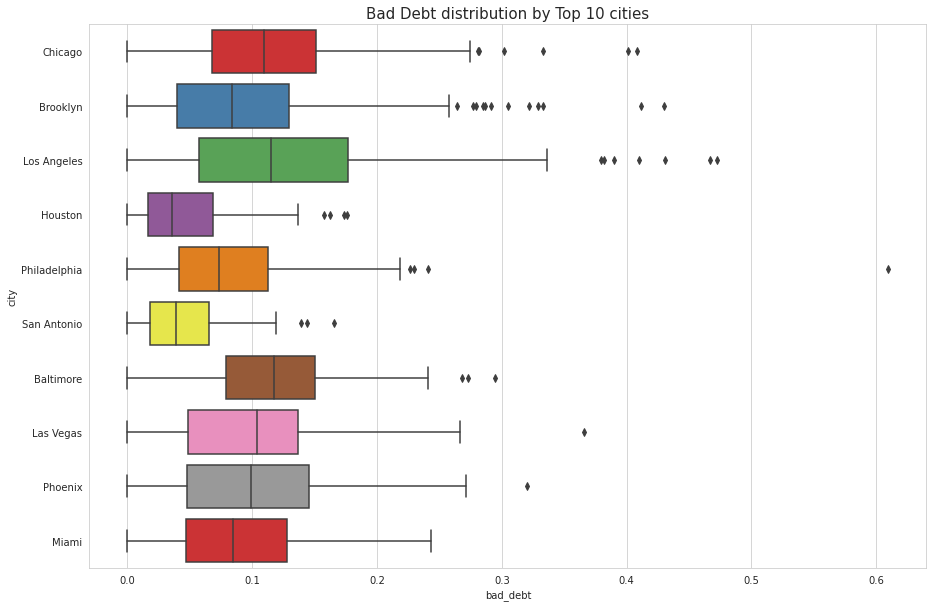

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=bplot,x='bad_debt', y='city',palette="Set1",order=['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia','San Antonio',
                      'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Bad Debt distribution by Top 10 cities', fontsize = 15)
plt.show()

 Create a collated income distribution chart for family income, house hold income, and remaining income

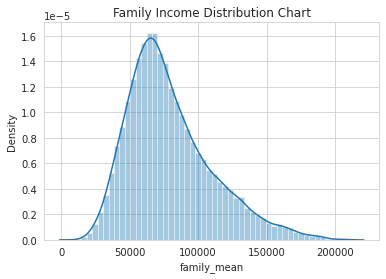

In [ ]:
sns.distplot(train['family_mean'])
plt.title("Family Income Distribution Chart")
plt.show()

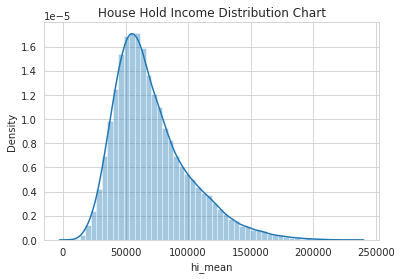

In [ ]:
sns.distplot(train['hi_mean'])
plt.title("House Hold Income Distribution Chart")
plt.show()

In [ ]:
train['remaining_income'] = train['family_mean']-train['hi_mean']

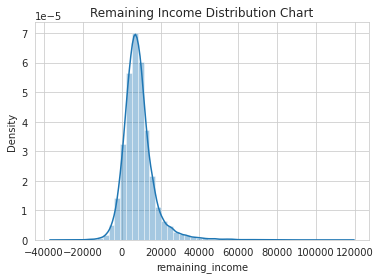

In [ ]:
sns.distplot(train['remaining_income'])
plt.title("Remaining Income Distribution Chart")
plt.show()

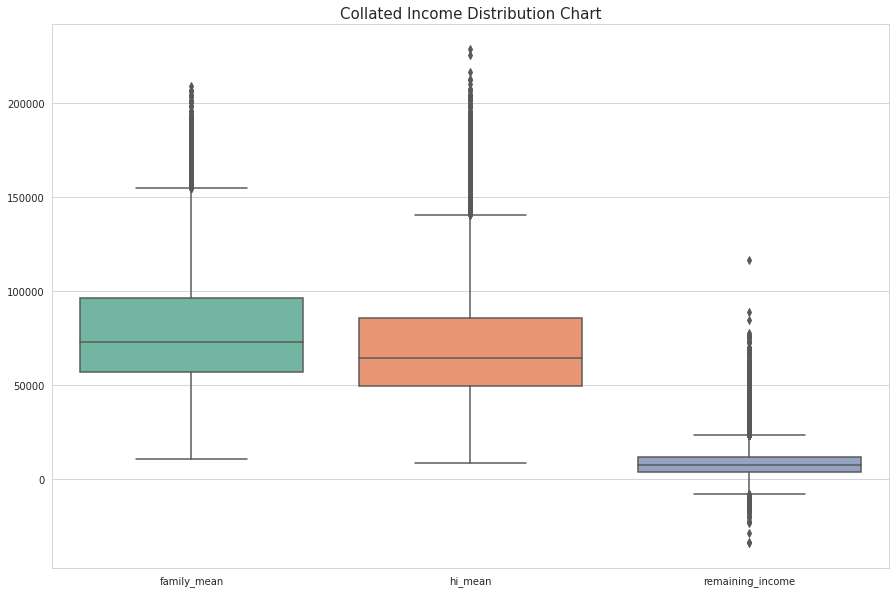

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=train[['family_mean','hi_mean','remaining_income']],palette="Set2").set_title('Collated Income Distribution Chart',fontsize=15)
plt.show()

#Project Task: Week 2

#Exploratory Data Analysis (EDA):

Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

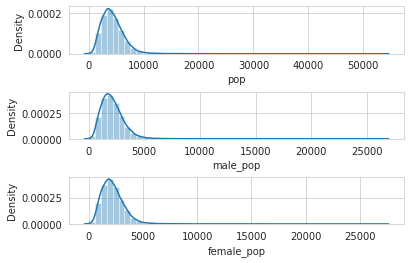

In [ ]:
fig,(ax1,ax2,ax3)= plt.subplots(3,1)
sns.distplot(train['pop'],ax=ax1)
sns.distplot(train['male_pop'],ax=ax2)
sns.distplot(train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout
plt.show()

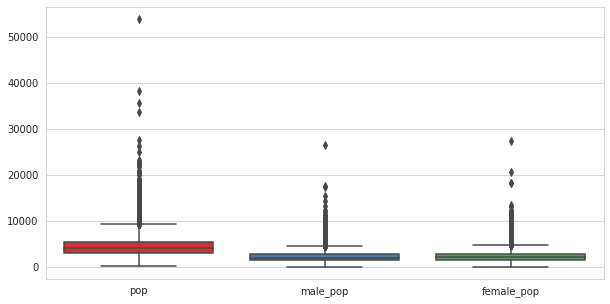

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train[['pop','male_pop','female_pop']],palette="Set1")
plt.show()

a) Use pop and ALand variables to create a new field called population density

In [ ]:
train['pop_density'] = train['pop']/train['ALand']
test['pop_density'] = test['pop']/train['ALand']

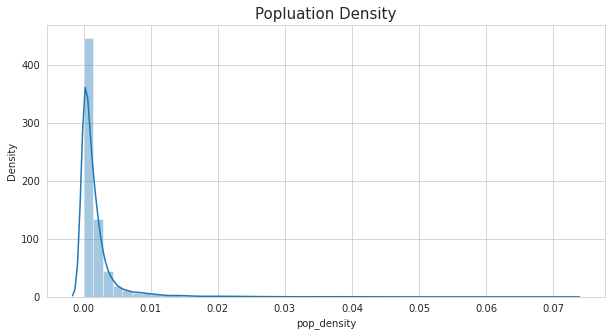

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train['pop_density']).set_title("Popluation Density",fontsize=15)
plt.show()

b)Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 

c) Visualize the findings using appropriate chart type

In [ ]:
train['median_age'] = (train['male_age_median']*train['male_pop']+train['female_age_median']*train['female_pop'])/train['pop']
test['median_age'] = (test['male_age_median']*test['male_pop']+test['female_age_median']*test['female_pop'])/test['pop']

In [ ]:
train.head(5)

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type primary  zip_code  area_code  ...  pct_own  married  \
UID                                         ...                     
267822   City   tract     13346        315  ...  0.79046  0.57851   
246444   City   tract     46616        574  ...  0.52483  0.34886   
245683   City   tract     46122        317  ...  0.85331  0.64745   
279653  Urban   tract       927        787  ...  0.65037  0.47257   
247218   City   tract     66502        785  ...  0.13046  0.12356   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  Less Than 50%   
246444      0.01426    0.01426   0.09030   0.04274  Less Than 50%   
245683      0.02830    0.01607   0.10657   0.09512  Less Than 50%   
279653      0.02021    0.02021   0.10106   0.01086  Less Than 50%   
247218      0.00000    0.00000   0.03109   0.05426  Less Than 50%   

        remaining_income  pop_density  median_age  
UID                                                
267822        4868.86384     0.000026   44.667430  
246444        8738.17744     0.001687   34.722748  
245683       10319.83114     0.000099   41.774472  
279653        7668.01017     0.002442   49.879012  
247218       22219.26930     0.002207   21.965629  

[5 rows x 82 columns]

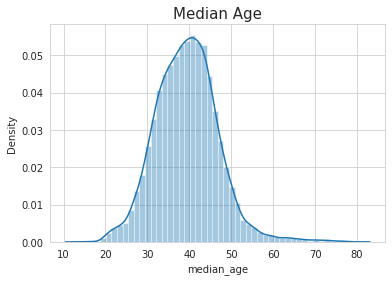

In [ ]:
sns.distplot(train['median_age']).set_title('Median Age',fontsize=15)
plt.show()

# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

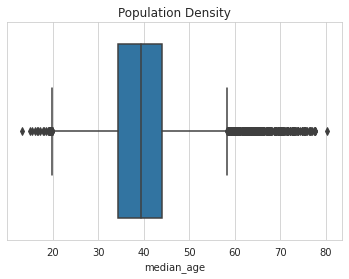

In [ ]:
sns.boxplot(train['median_age']).set_title("Population Density")
plt.show()

Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [ ]:
train['pop'].value_counts()

4028     14
4824     14
3842     14
3706     14
4409     14
3534     13
4387     13
4566     13
2872     13
4946     13
2451     13
2551     12
3370     12
3495     12
3570     12
4902     12
3813     12
3273     12
3947     12
4603     12
4048     12
3401     12
3963     12
4557     12
2555     12
3655     12
2749     12
3485     12
4514     12
4035     12
4452     11
4853     11
2977     11
2508     11
3288     11
3752     11
3163     11
4828     11
5245     11
3598     11
3558     11
5019     11
3417     11
4388     11
2961     11
4735     11
2493     11
3059     11
4223     11
2385     11
3369     11
4318     11
3644     11
3496     11
3463     11
2707     11
3356     11
6083     11
4019     11
3528     11
5154     11
3265     11
3438     11
3510     10
4289     10
2930     10
5114     10
4478     10
4067     10
3497     10
3024     10
4481     10
3901     10
3866     10
4125     10
4779     10
3468     10
3726     10
3257     10
3275     10
3702     10
3656     10
2395     10
3634

In [ ]:
train['male_age_median'].unique()

array([44.     , 32.     , 40.83333, 48.91667, 22.41667, 41.41667,
       40.     , 53.08333, 30.66667, 47.33333, 34.33333, 46.91667,
       49.75   , 34.66667, 42.58333, 45.83333, 44.16667, 32.5    ,
       30.41667, 27.41667, 30.08333, 41.16667, 38.75   , 30.     ,
       31.16667, 46.75   , 36.66667, 38.16667, 34.91667, 40.16667,
       27.66667, 39.33333, 42.83333, 36.41667, 41.91667, 44.5    ,
       51.75   , 43.41667, 51.66667, 34.     , 64.08333, 51.41667,
       20.25   , 29.     , 28.     , 41.25   , 49.83333, 24.91667,
       45.41667, 28.16667, 34.08333, 36.91667, 46.66667, 36.16667,
       36.75   , 38.5    , 36.08333, 47.5    , 51.16667, 48.16667,
       33.     , 25.25   , 37.08333, 42.66667, 40.25   , 29.75   ,
       38.41667, 37.41667, 42.     , 44.08333, 36.5    , 32.16667,
       35.91667, 39.5    , 37.75   , 38.58333, 21.25   , 35.33333,
       40.41667, 46.08333, 54.41667, 41.5    , 37.83333, 31.41667,
       41.75   , 32.41667, 26.66667, 39.83333, 31.91667, 34.58

The IntelliSense Age Group defaults are:

Kid(0 to 9)

Youth (10 to 17)

Young Adult (18 to 35)

Adult (36 to 55)

Senior (56 and up)

In [ ]:
bins = [0,12,18,35,55,100]
labels = ['Kids','Youth','Young Adult','Adult','Senior']

In [ ]:
train['state'].unique()

array(['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas',
       'South Carolina', 'California', 'Arkansas', 'Maryland', 'Illinois',
       'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado',
       'Rhode Island', 'Mississippi', 'New Jersey', 'Oregon', 'Arizona',
       'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina',
       'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho',
       'South Dakota', 'Minnesota', 'Missouri', 'Washington', 'Wyoming',
       'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts',
       'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
       'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota',
       'New Mexico', 'Maine', 'Delaware'], dtype=object)

In [ ]:
train['state'].nunique()

52

In [ ]:
pd.set_option('display.max_columns',None)

a) Analyze the married, separated, and divorced population for these population brackets

In [ ]:
train['male_population'] = pd.cut(train['male_age_median'],bins,labels=labels)
train['female_population'] = pd.cut(train['female_age_median'],bins,labels=labels)
test['male_population'] = pd.cut(test['male_age_median'],bins,labels=labels)
test['female_population'] = pd.cut(test['female_age_median'],bins,labels=labels)

In [ ]:
train.head()

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type primary  zip_code  area_code        lat        lng        ALand  \
UID                                                                             
267822   City   tract     13346        315  42.840812 -75.501524  202183361.0   
246444   City   tract     46616        574  41.701441 -86.266614    1560828.0   
245683   City   tract     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban   tract       927        787  18.396103 -66.104169    1105793.0   
247218   City   tract     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0   

b) Visualize using appropriate chart type

To ease the visulaize we are splitting states into 4 part which means there are  52 unique states and we are divding 52 states by 4.So, one part of the splitting will contain 13 states.

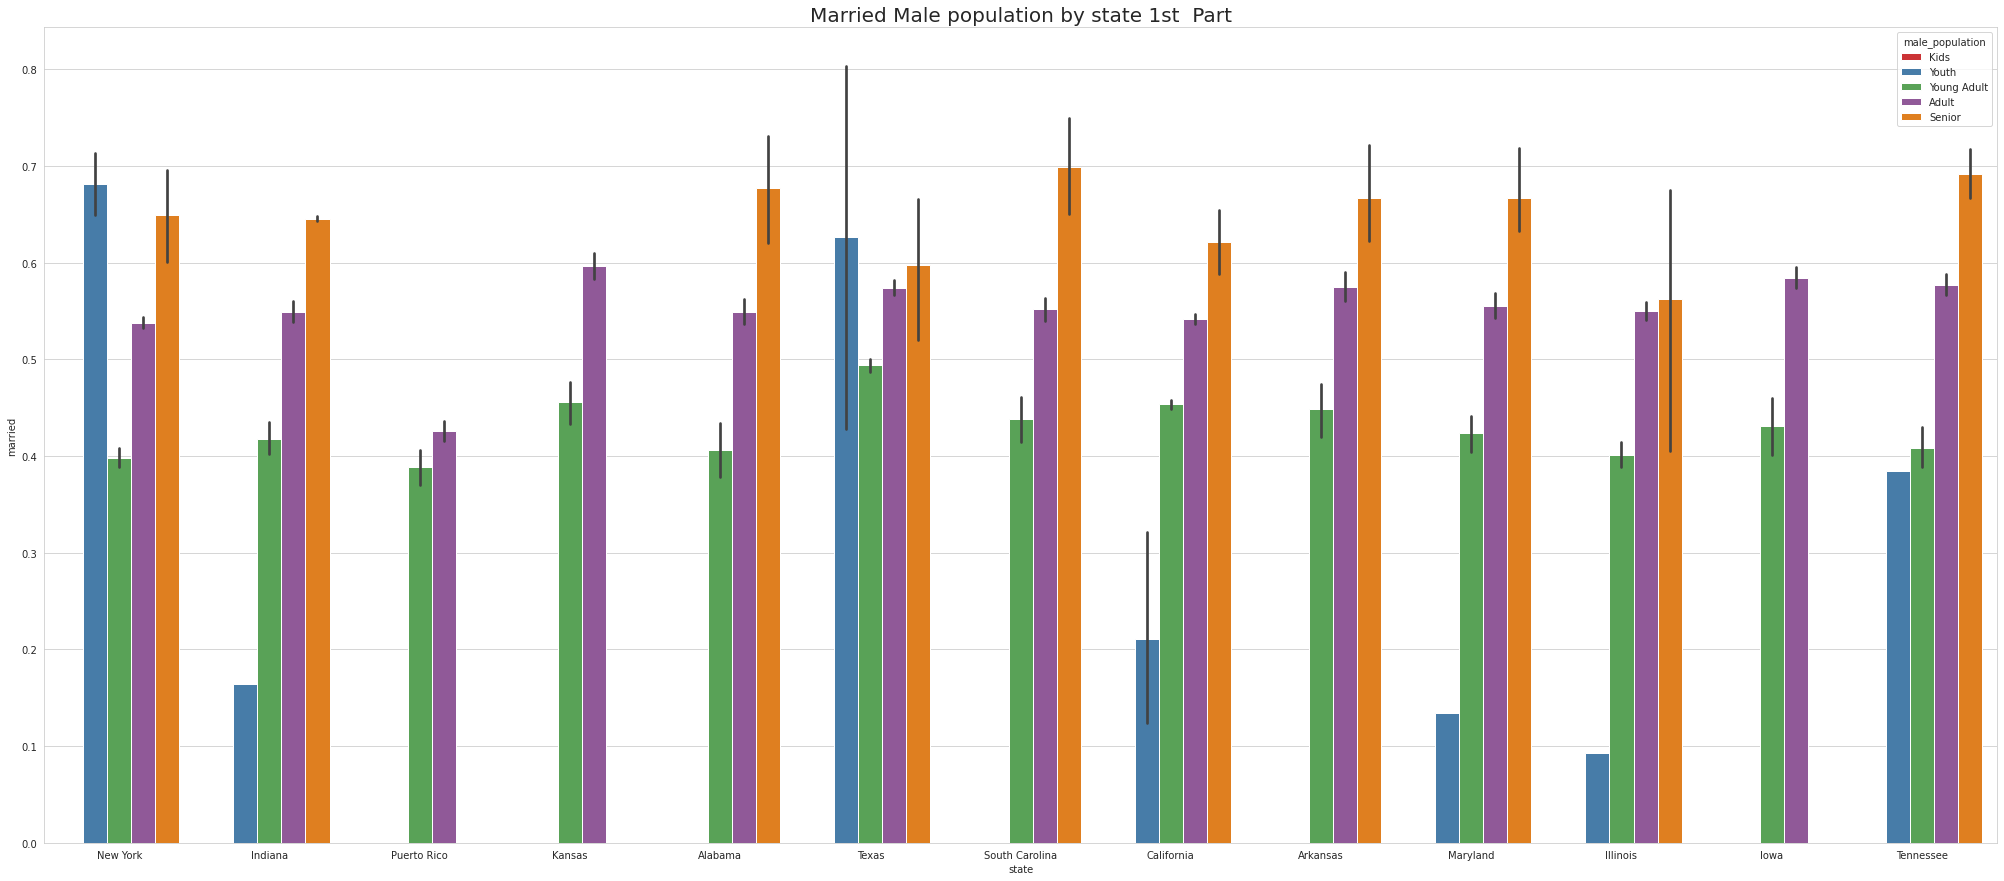

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='male_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Married Male population by state 1st  Part', fontsize = 20)

plt.show()

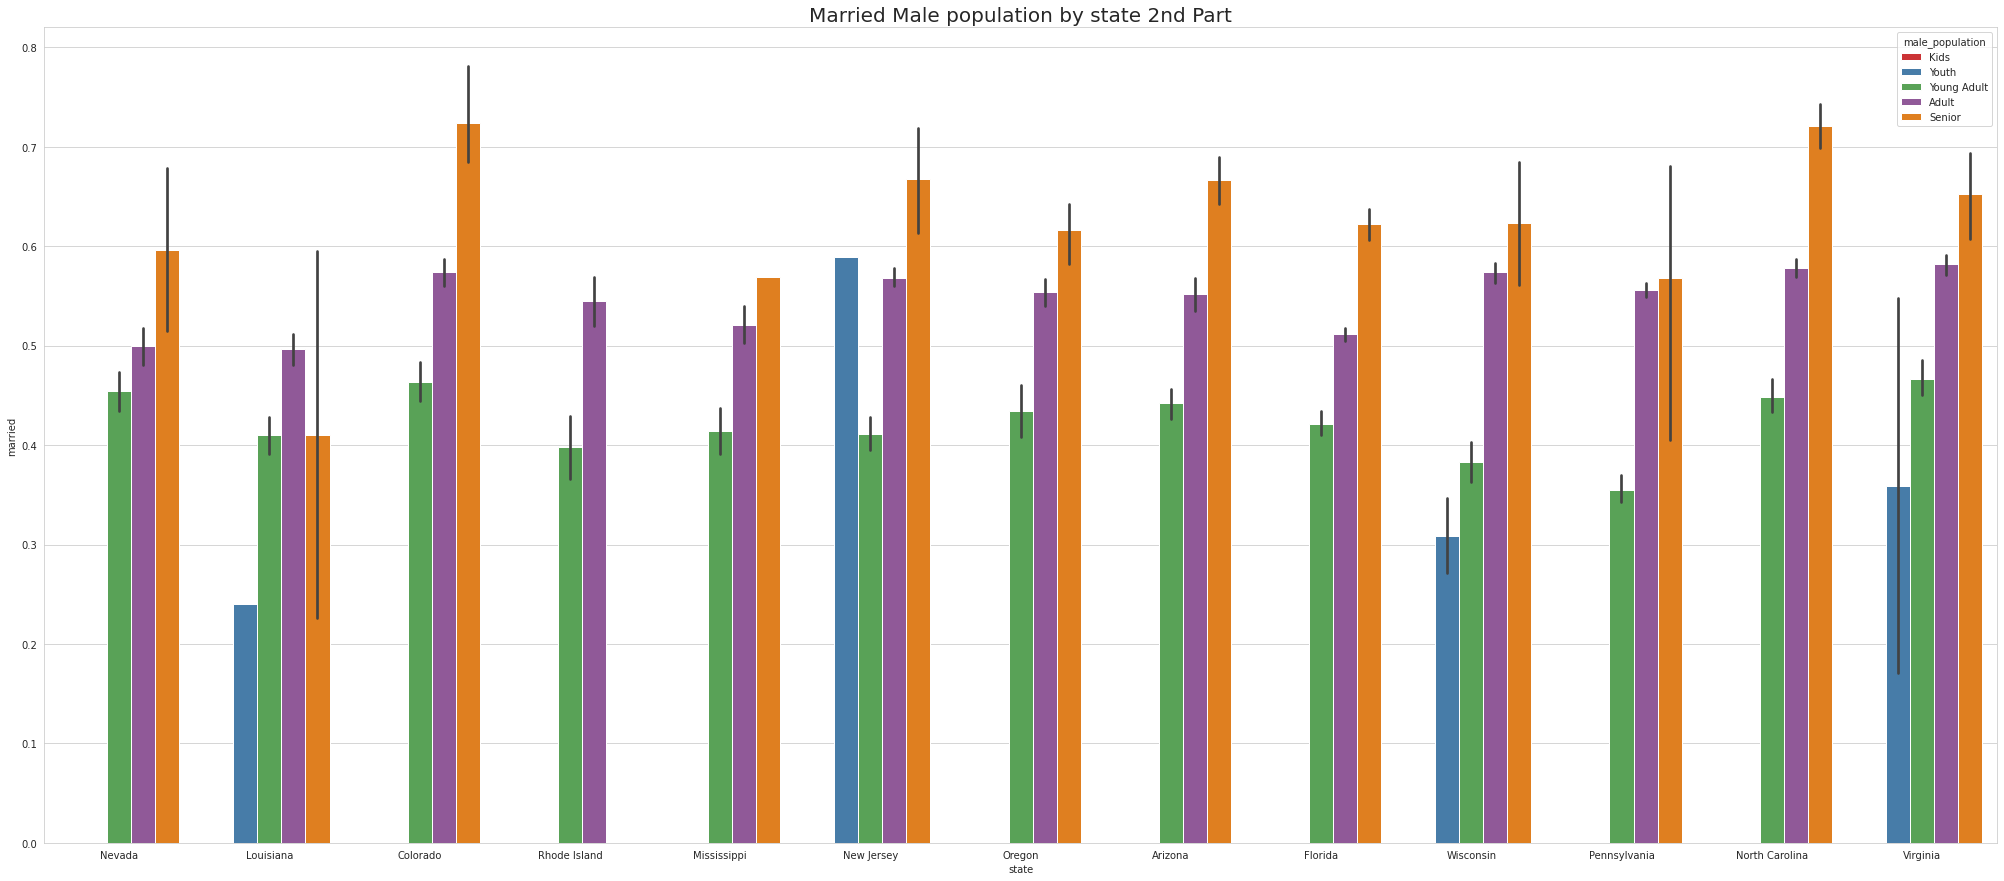

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='male_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Married Male population by state 2nd Part', fontsize = 20)

plt.show()

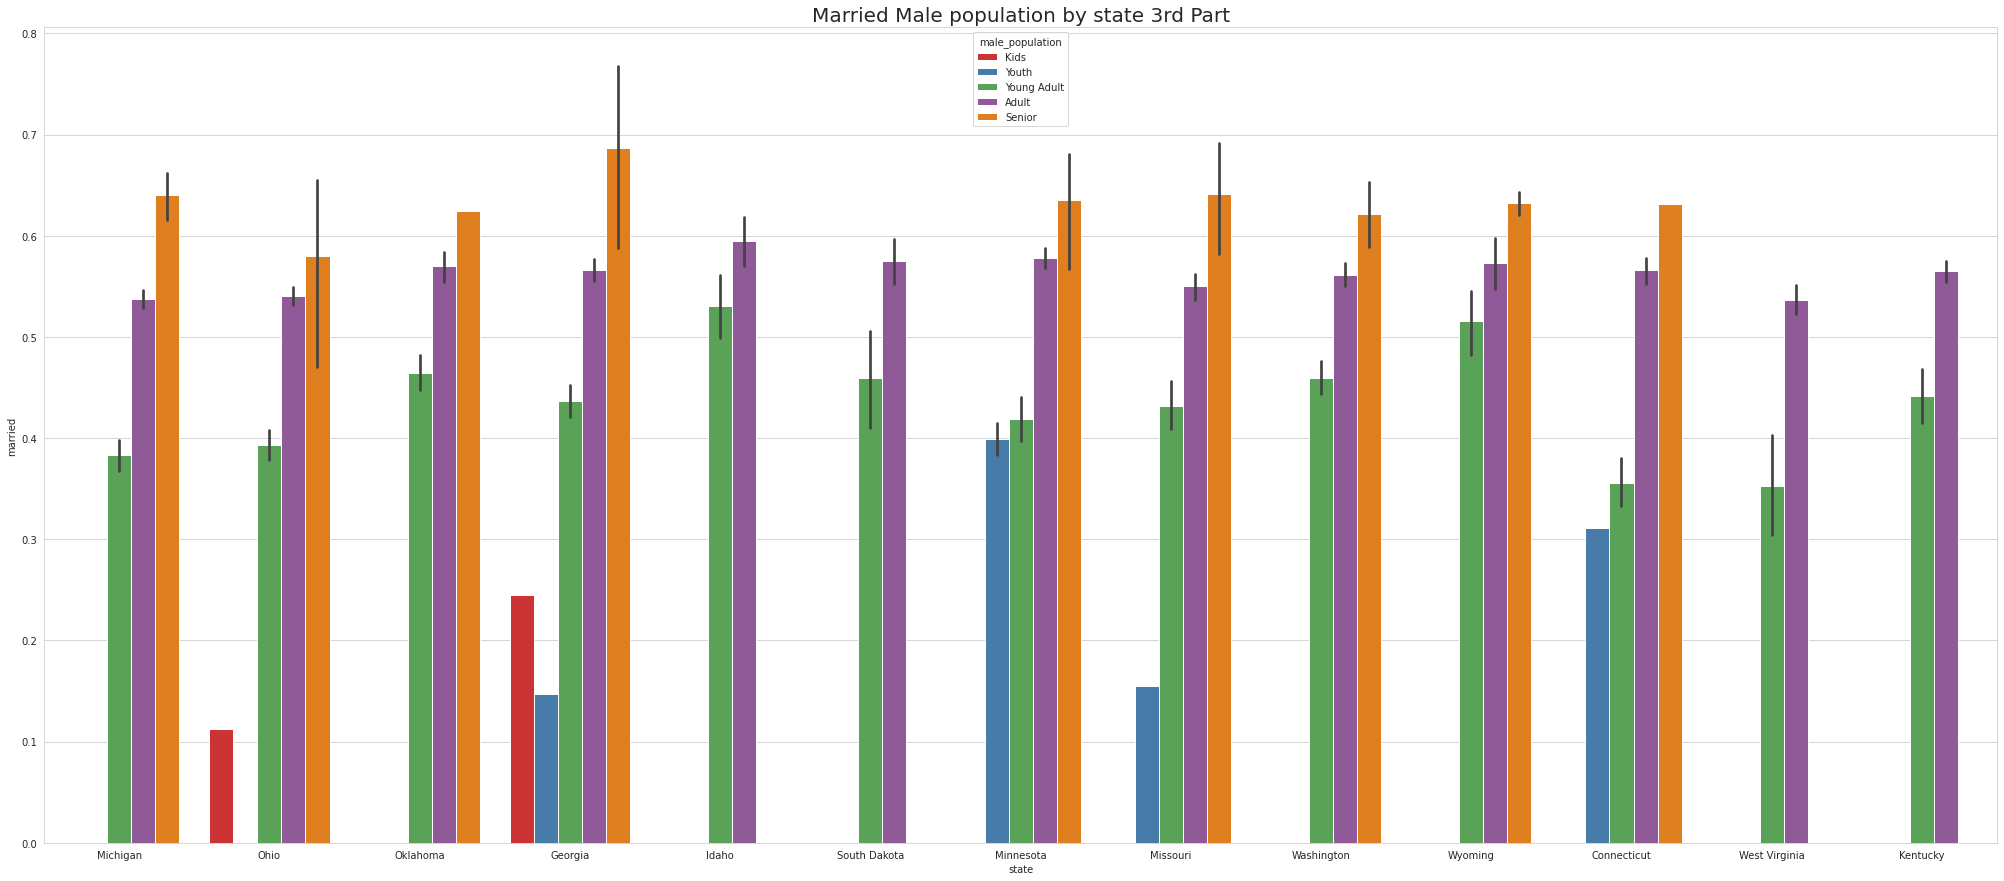

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='male_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Married Male population by state 3rd Part', fontsize = 20)

plt.show()

Ohio & Georgia have Married Male KIDS

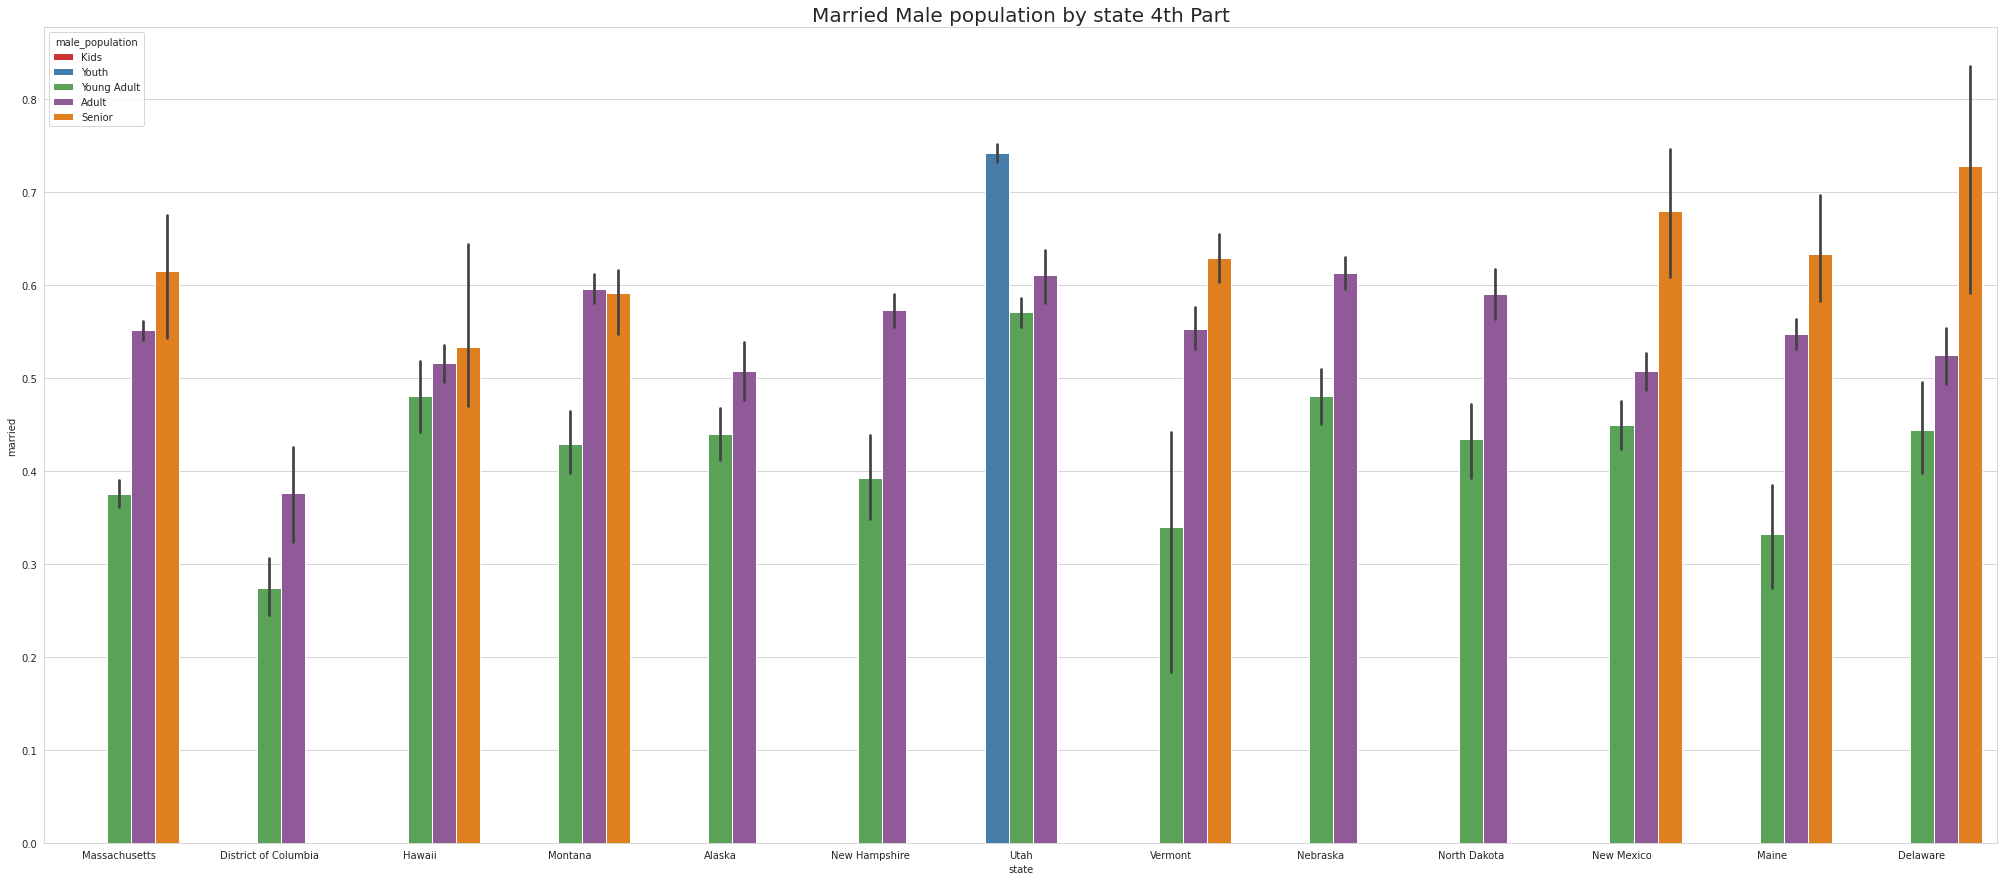

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='male_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Married Male population by state 4th Part', fontsize = 20)

plt.show()

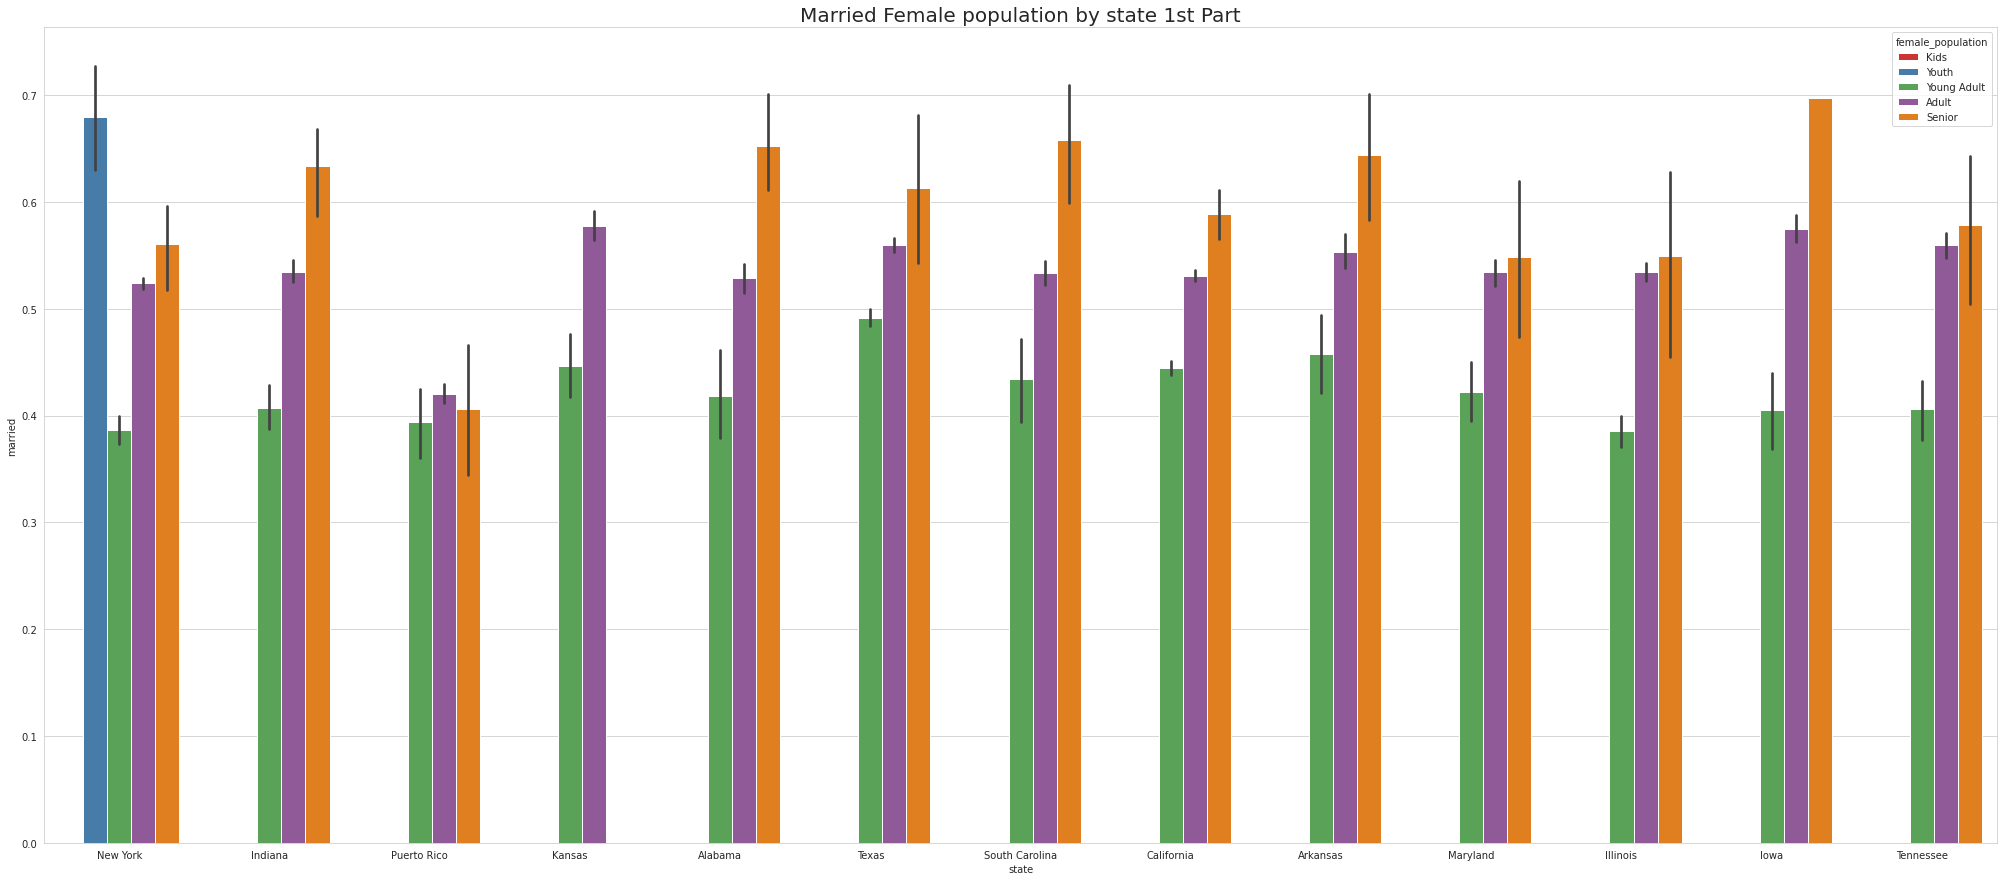

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='female_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Married Female population by state 1st Part', fontsize = 20)

plt.show()

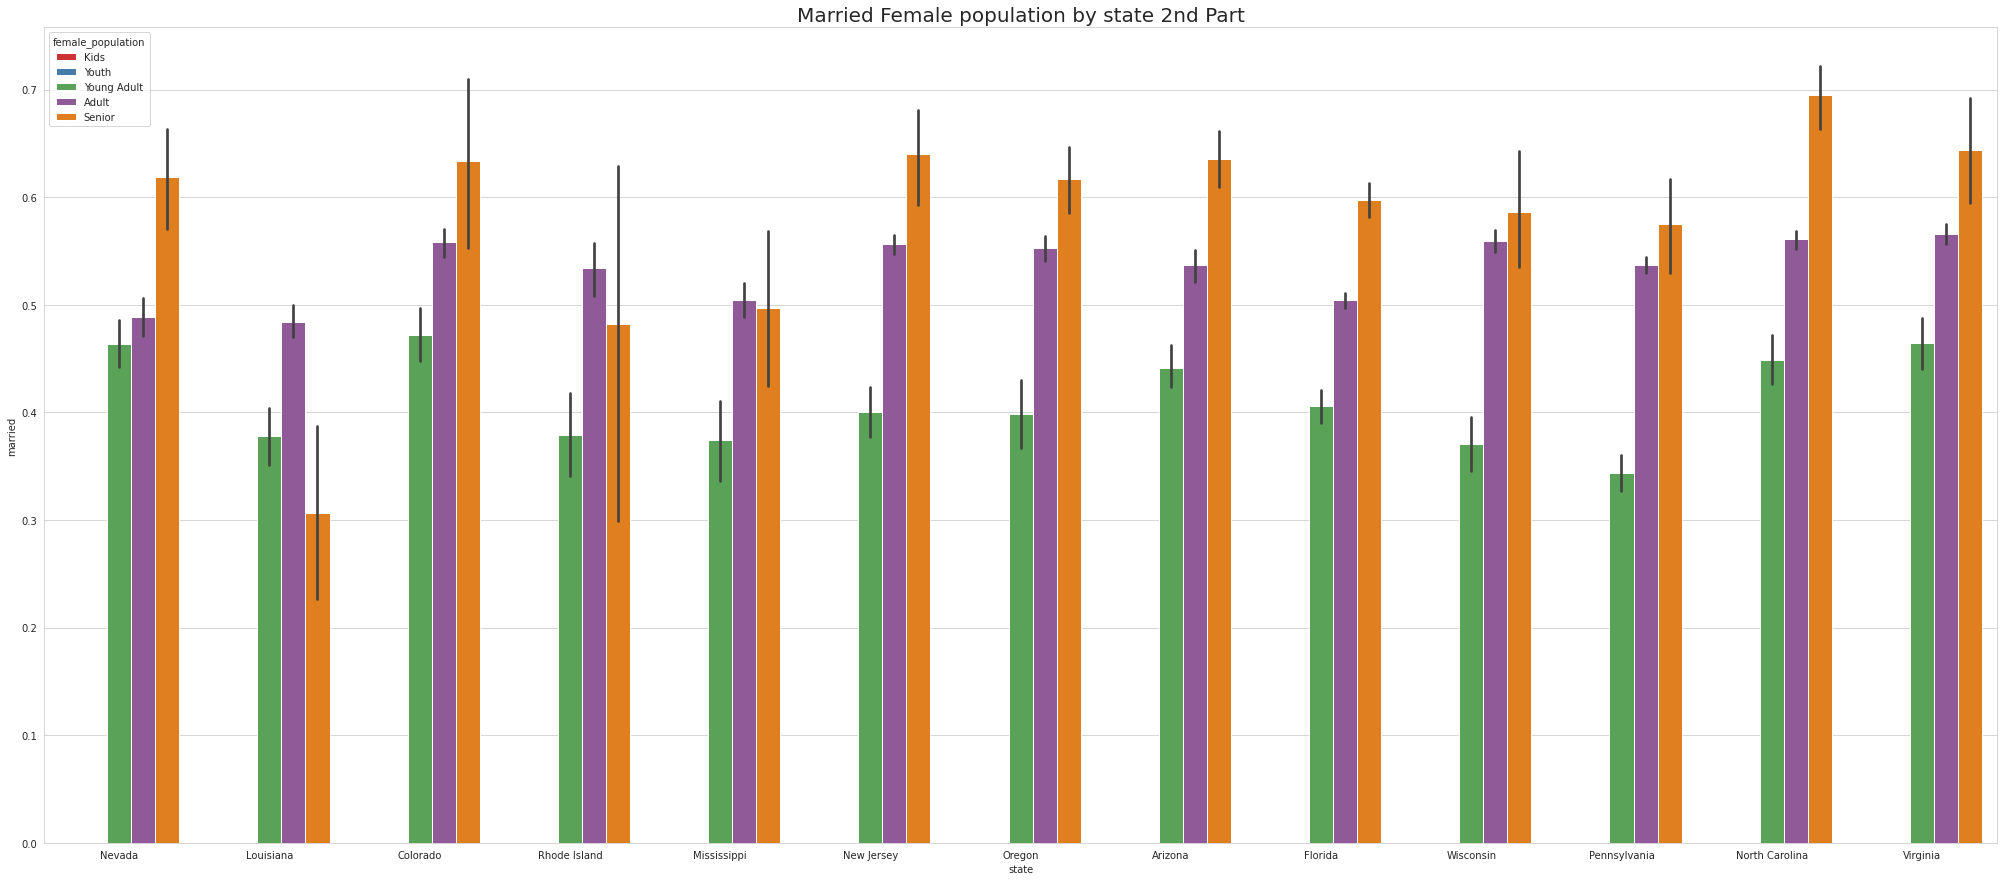

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='female_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Married Female population by state 2nd Part', fontsize = 20)

plt.show()

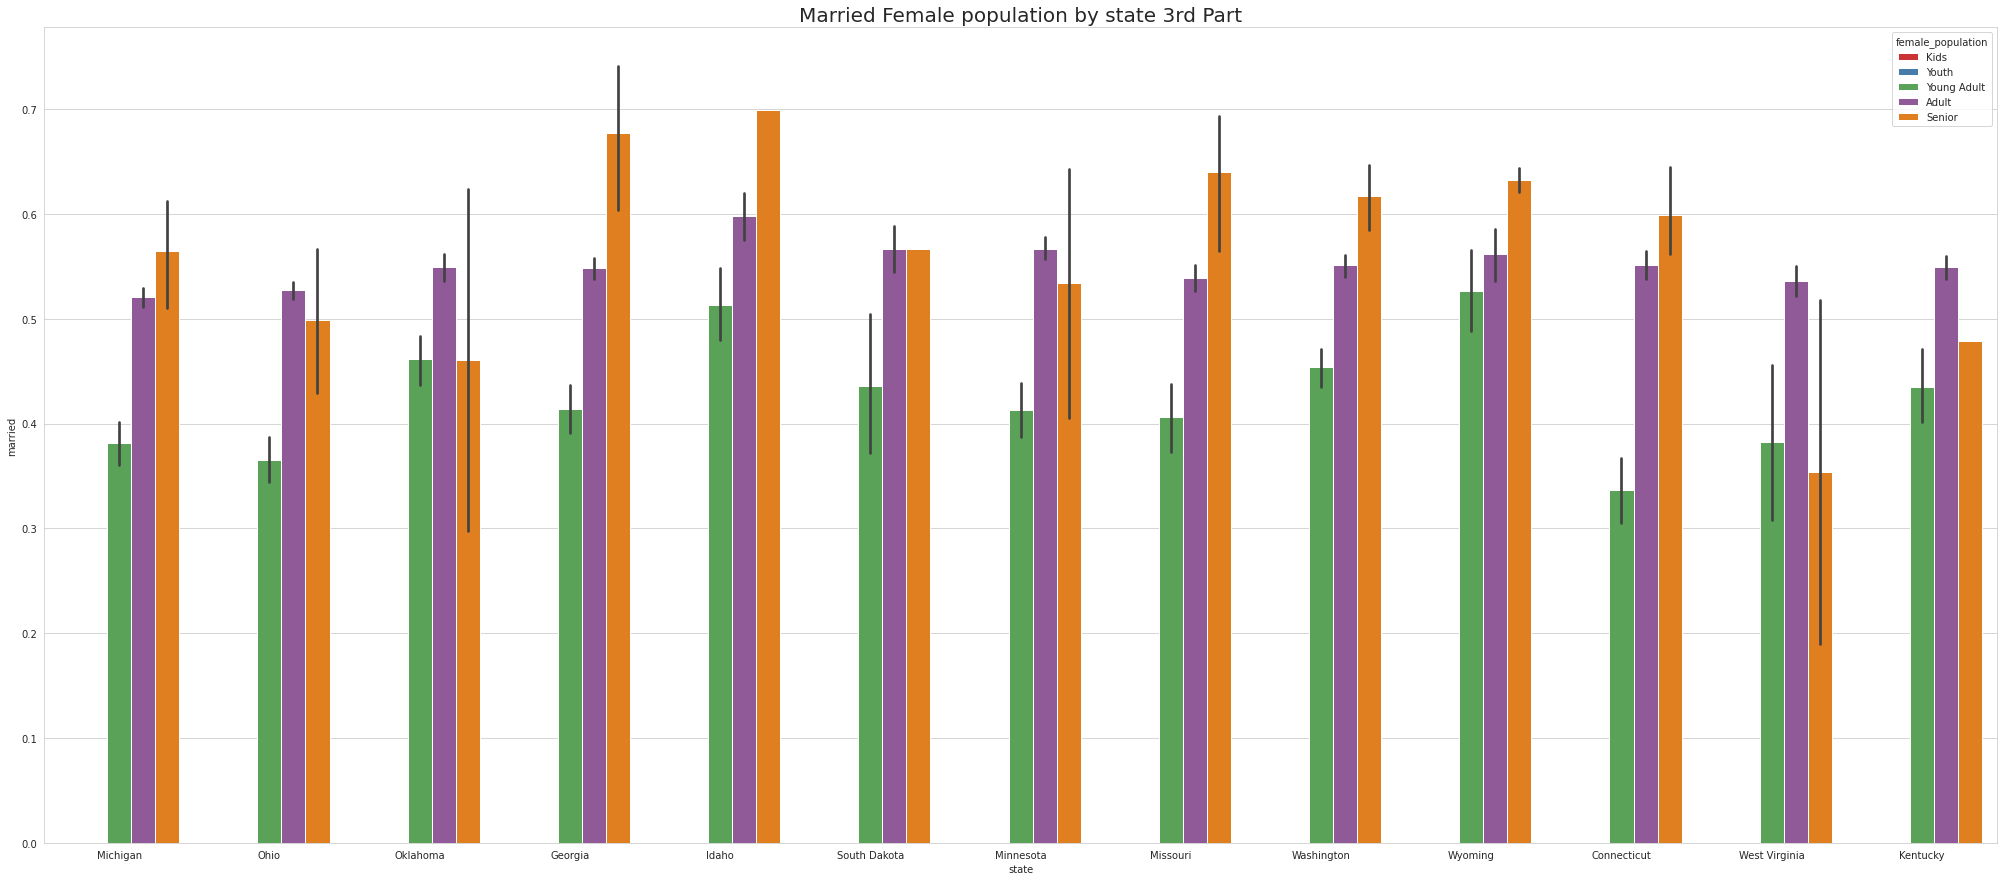

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='female_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Married Female population by state 3rd Part', fontsize = 20)

plt.show()

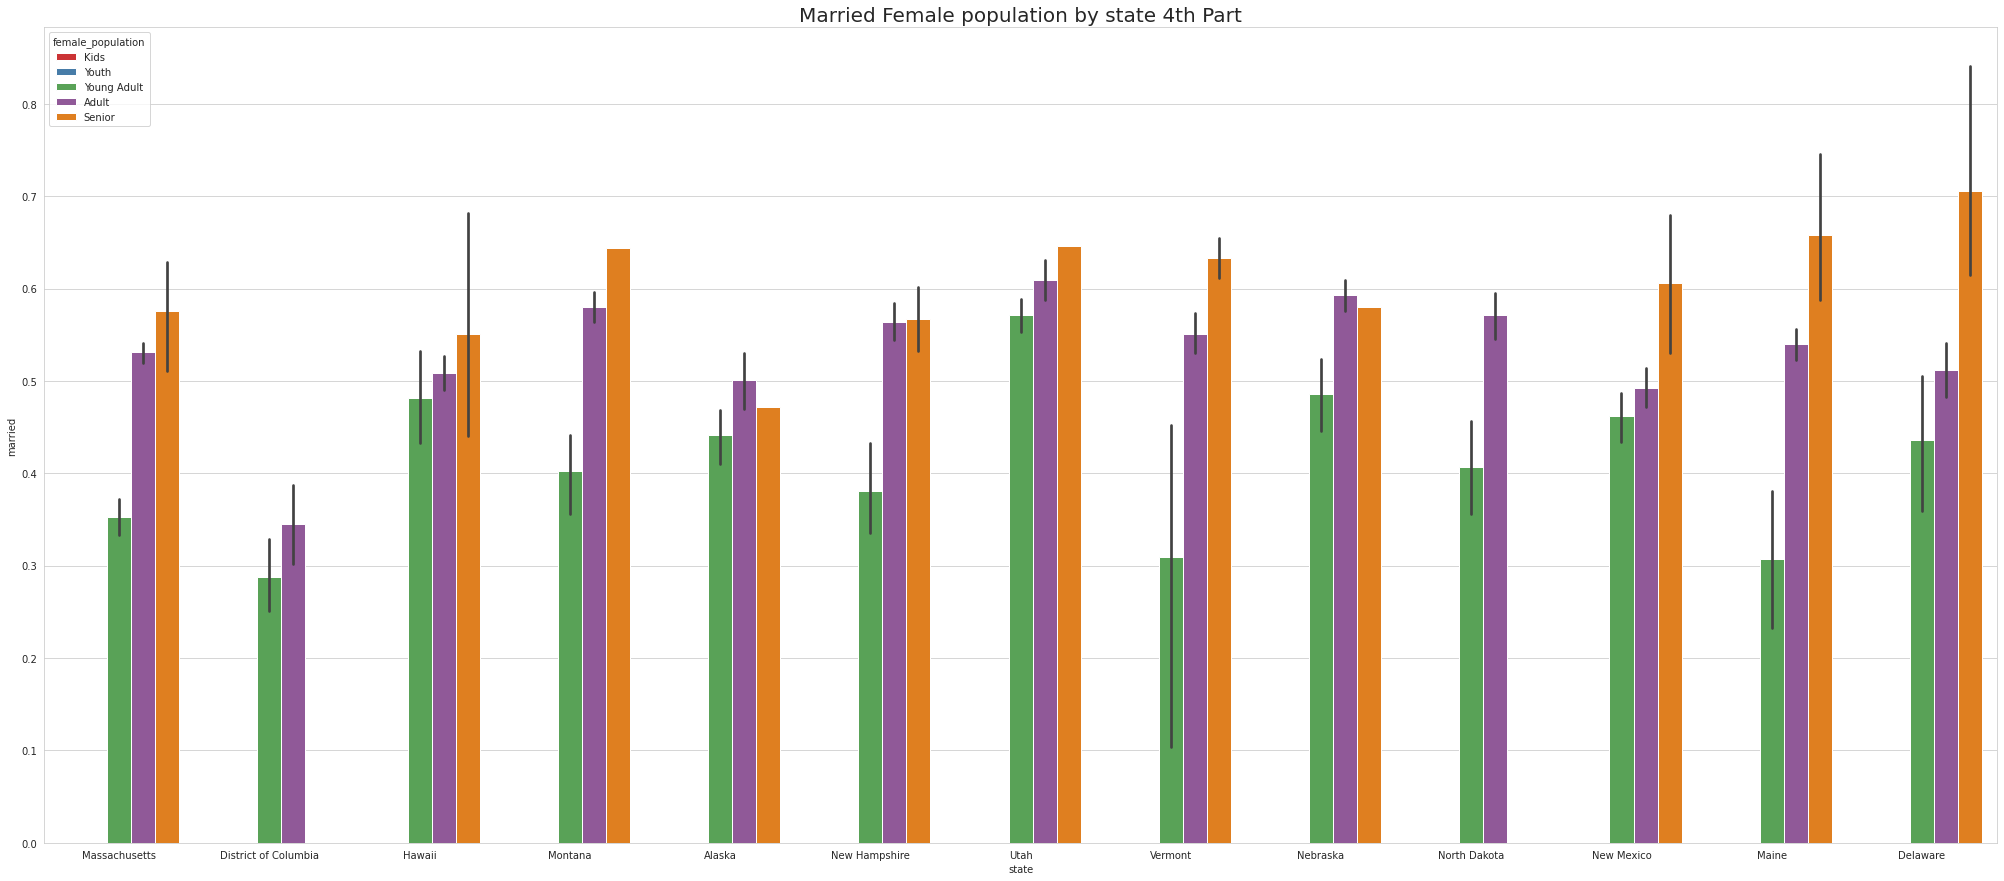

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='married',hue='female_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Married Female population by state 4th Part', fontsize = 20)

plt.show()

Except NewYork no other states has youth 

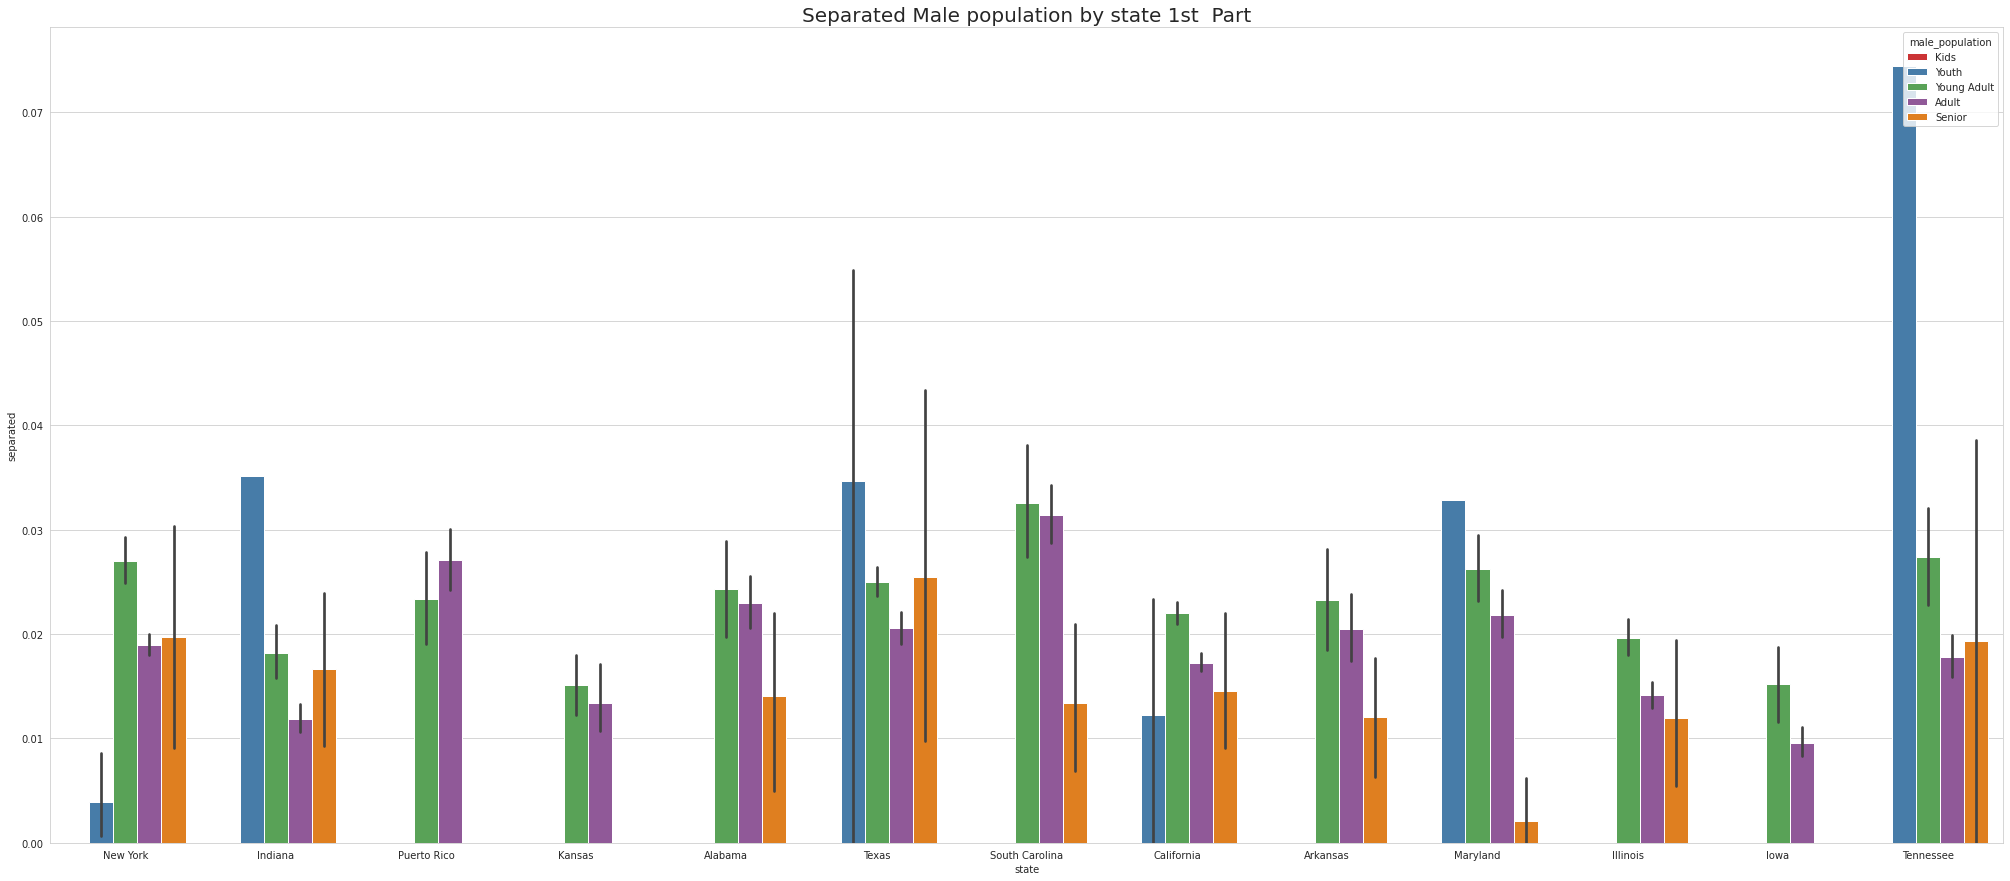

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='male_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Separated Male population by state 1st  Part', fontsize = 20)

plt.show()

Tennessee has Highest youth separated in 1st part

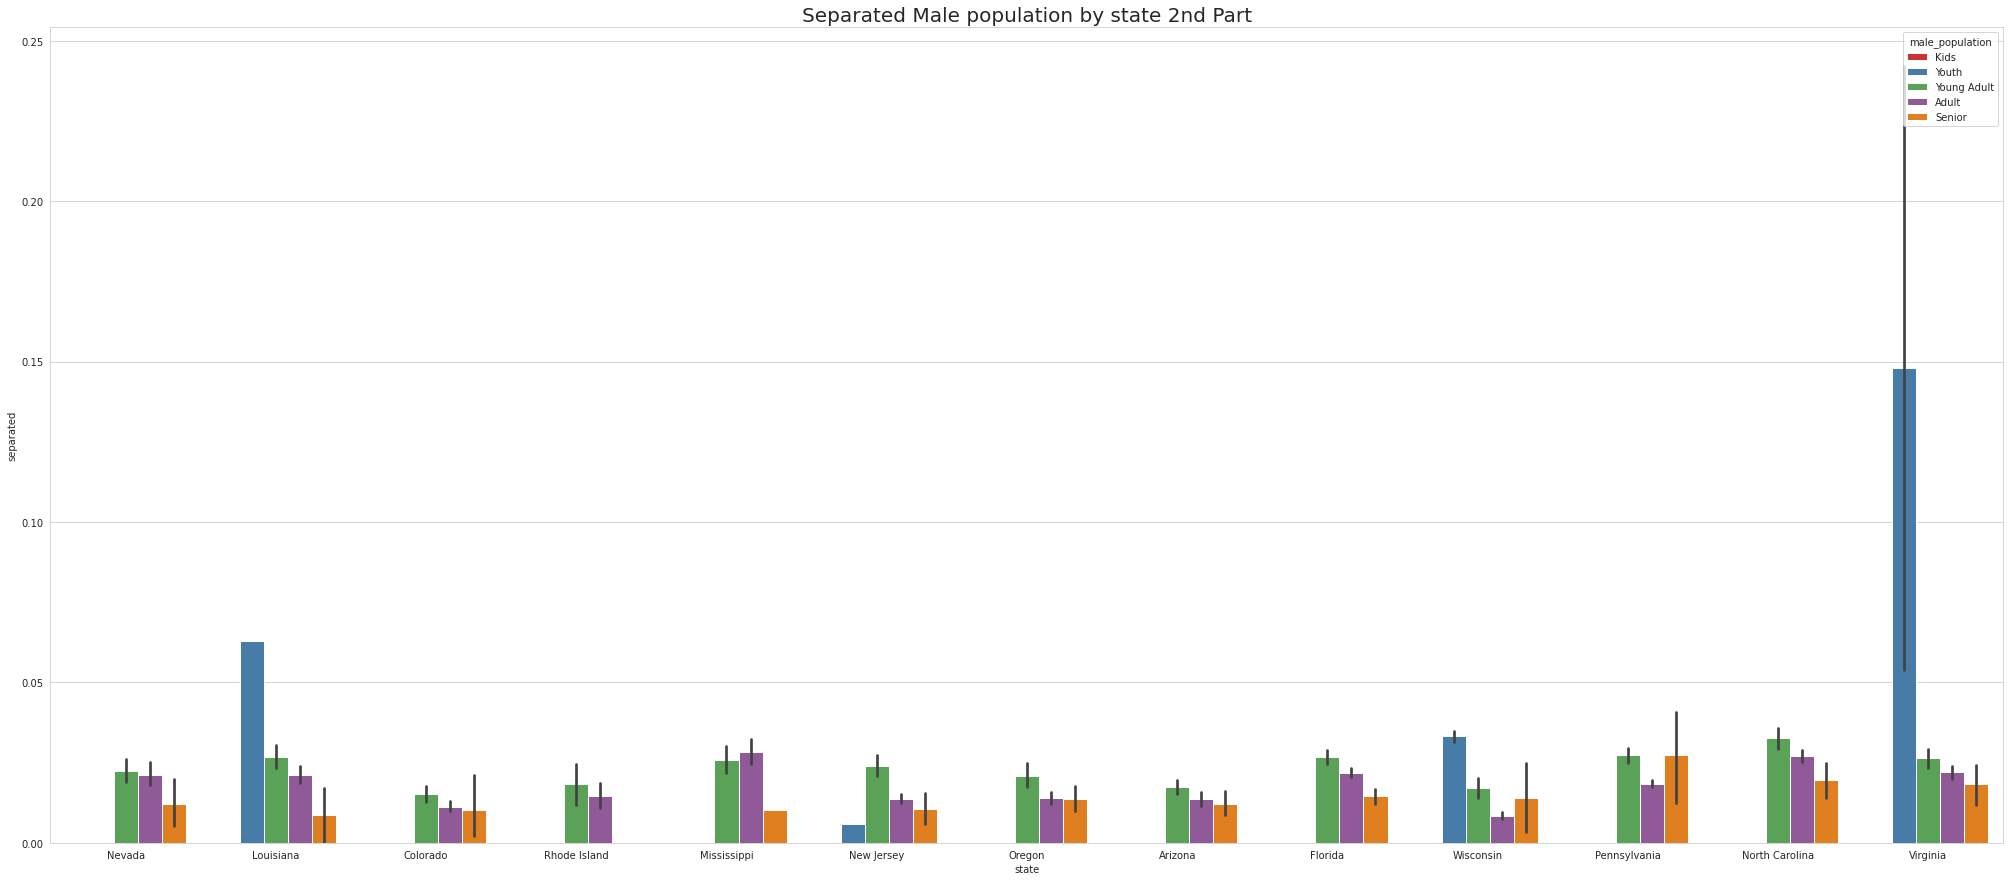

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='male_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Separated Male population by state 2nd Part', fontsize = 20)

plt.show()

Virgina Has highest youth seperated in 2nd part

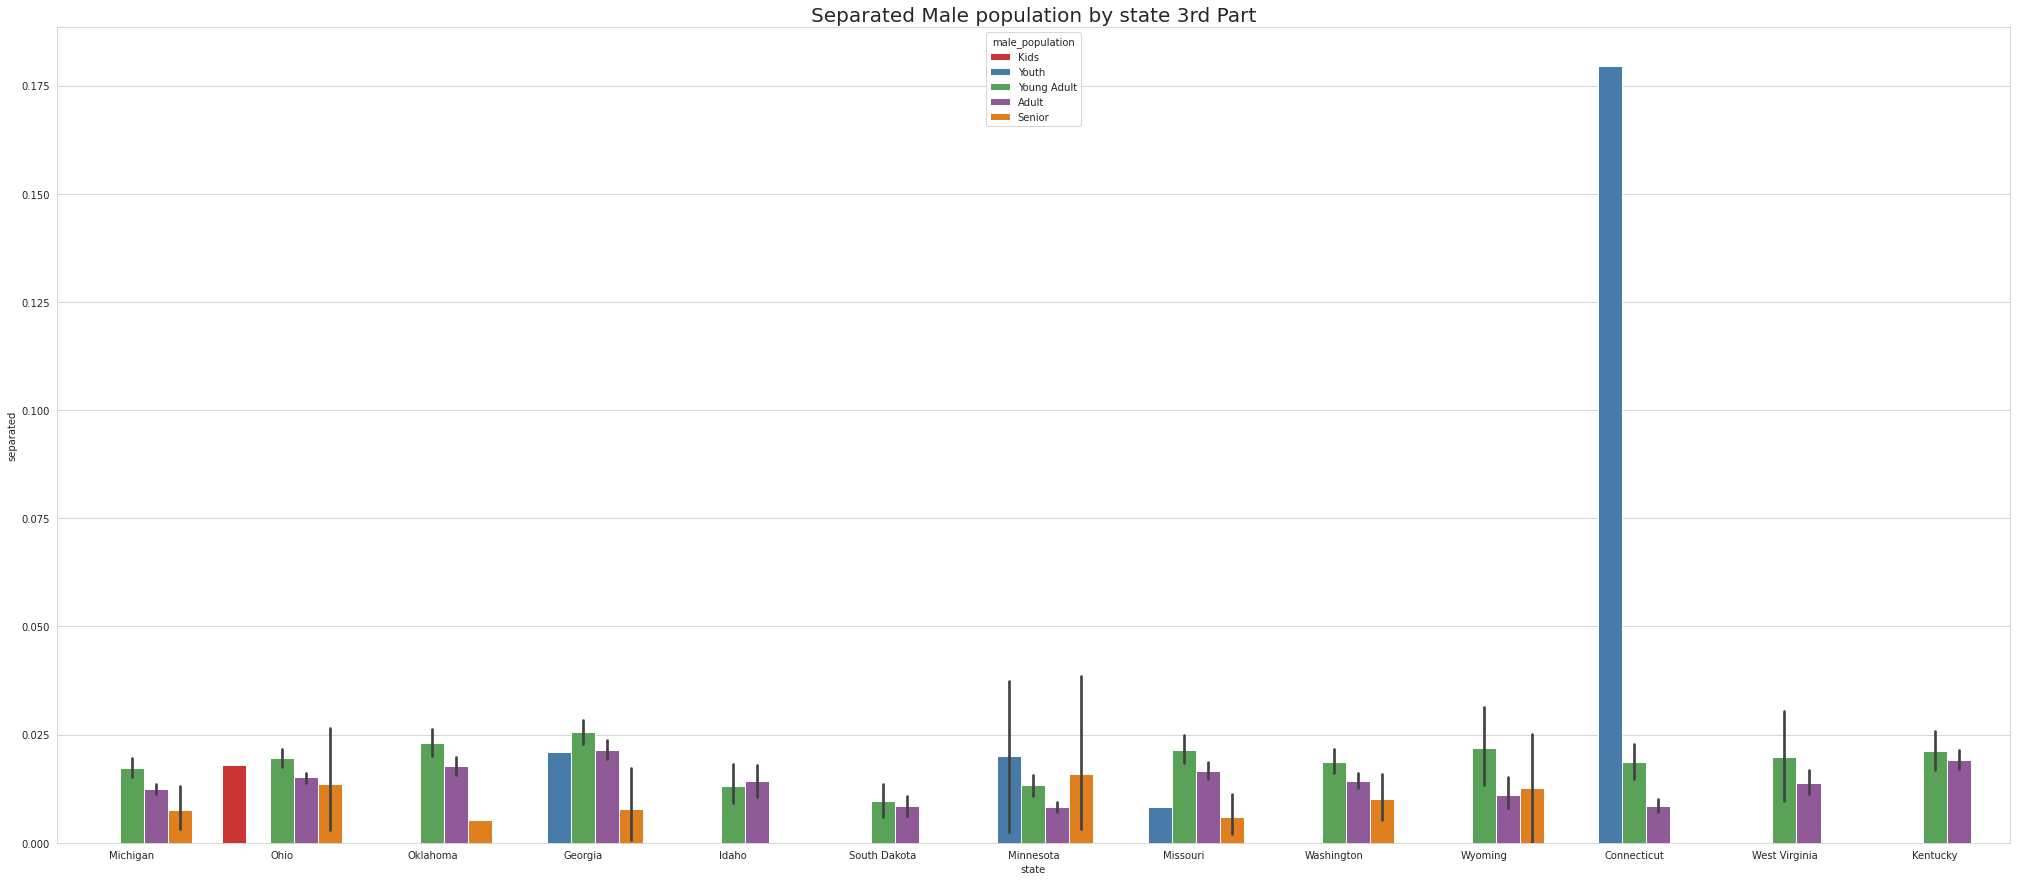

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='male_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Separated Male population by state 3rd Part', fontsize = 20)

plt.show()

Connecticut has highest youth seperated in 3rd Part

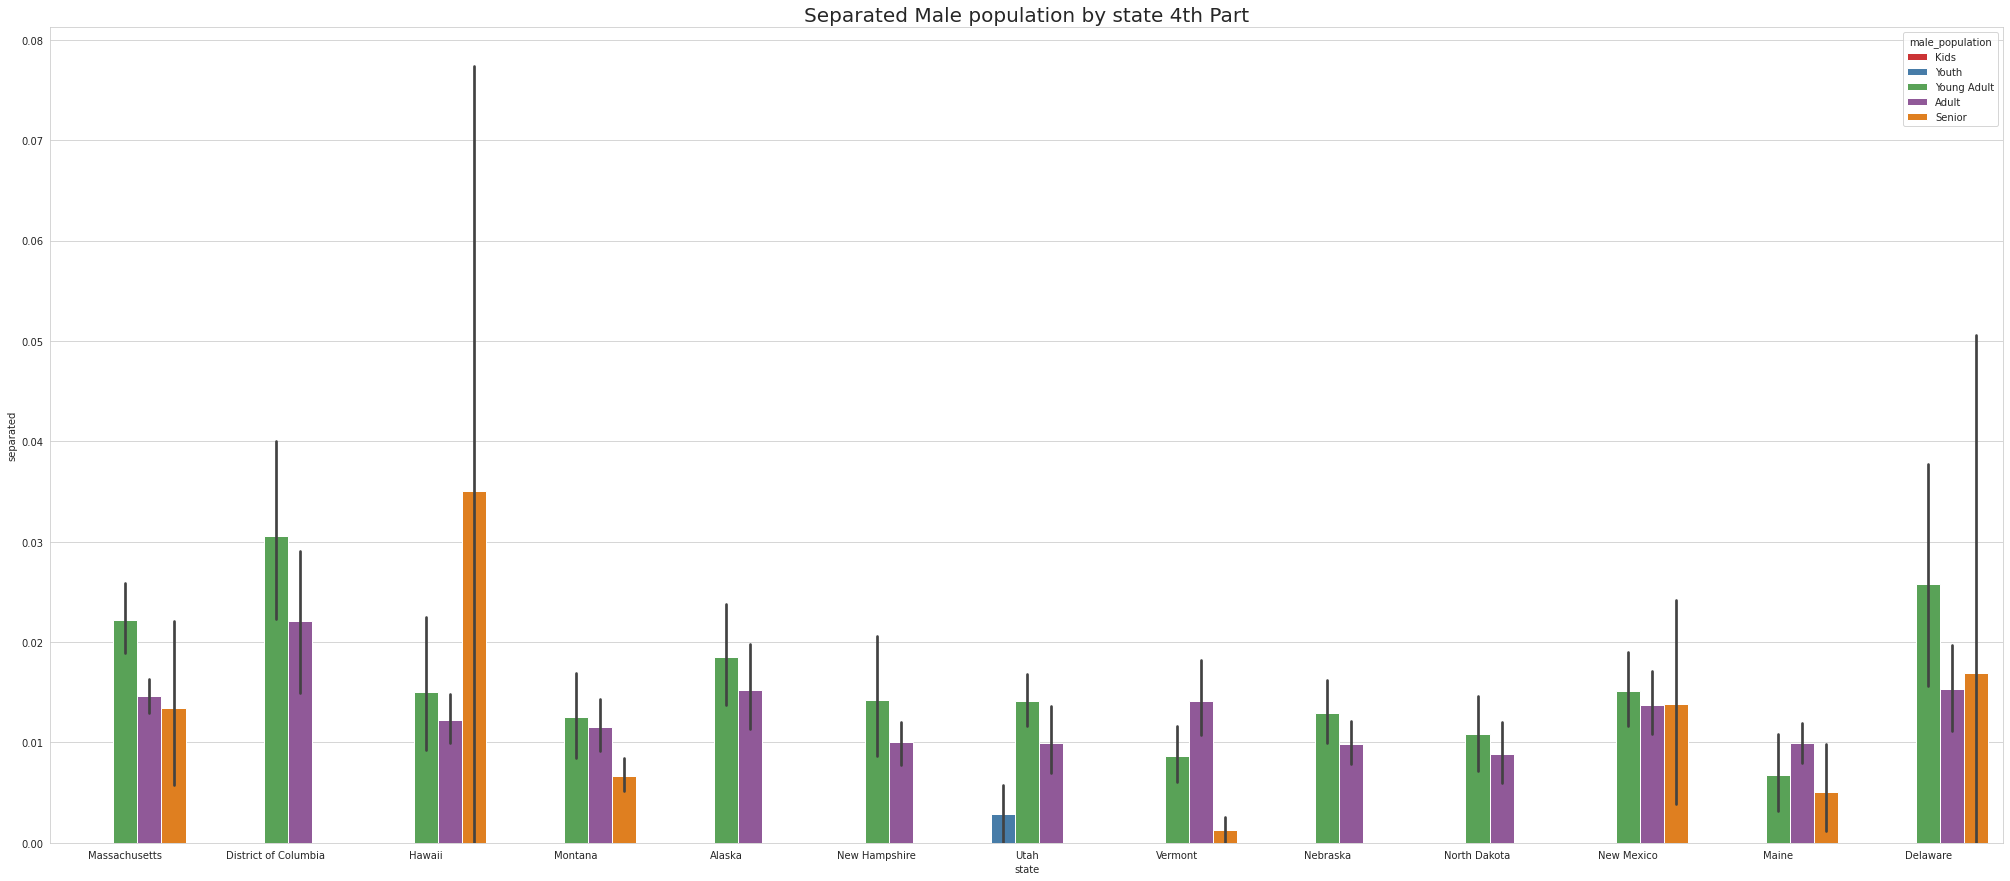

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='male_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Separated Male population by state 4th Part', fontsize = 20)

plt.show()

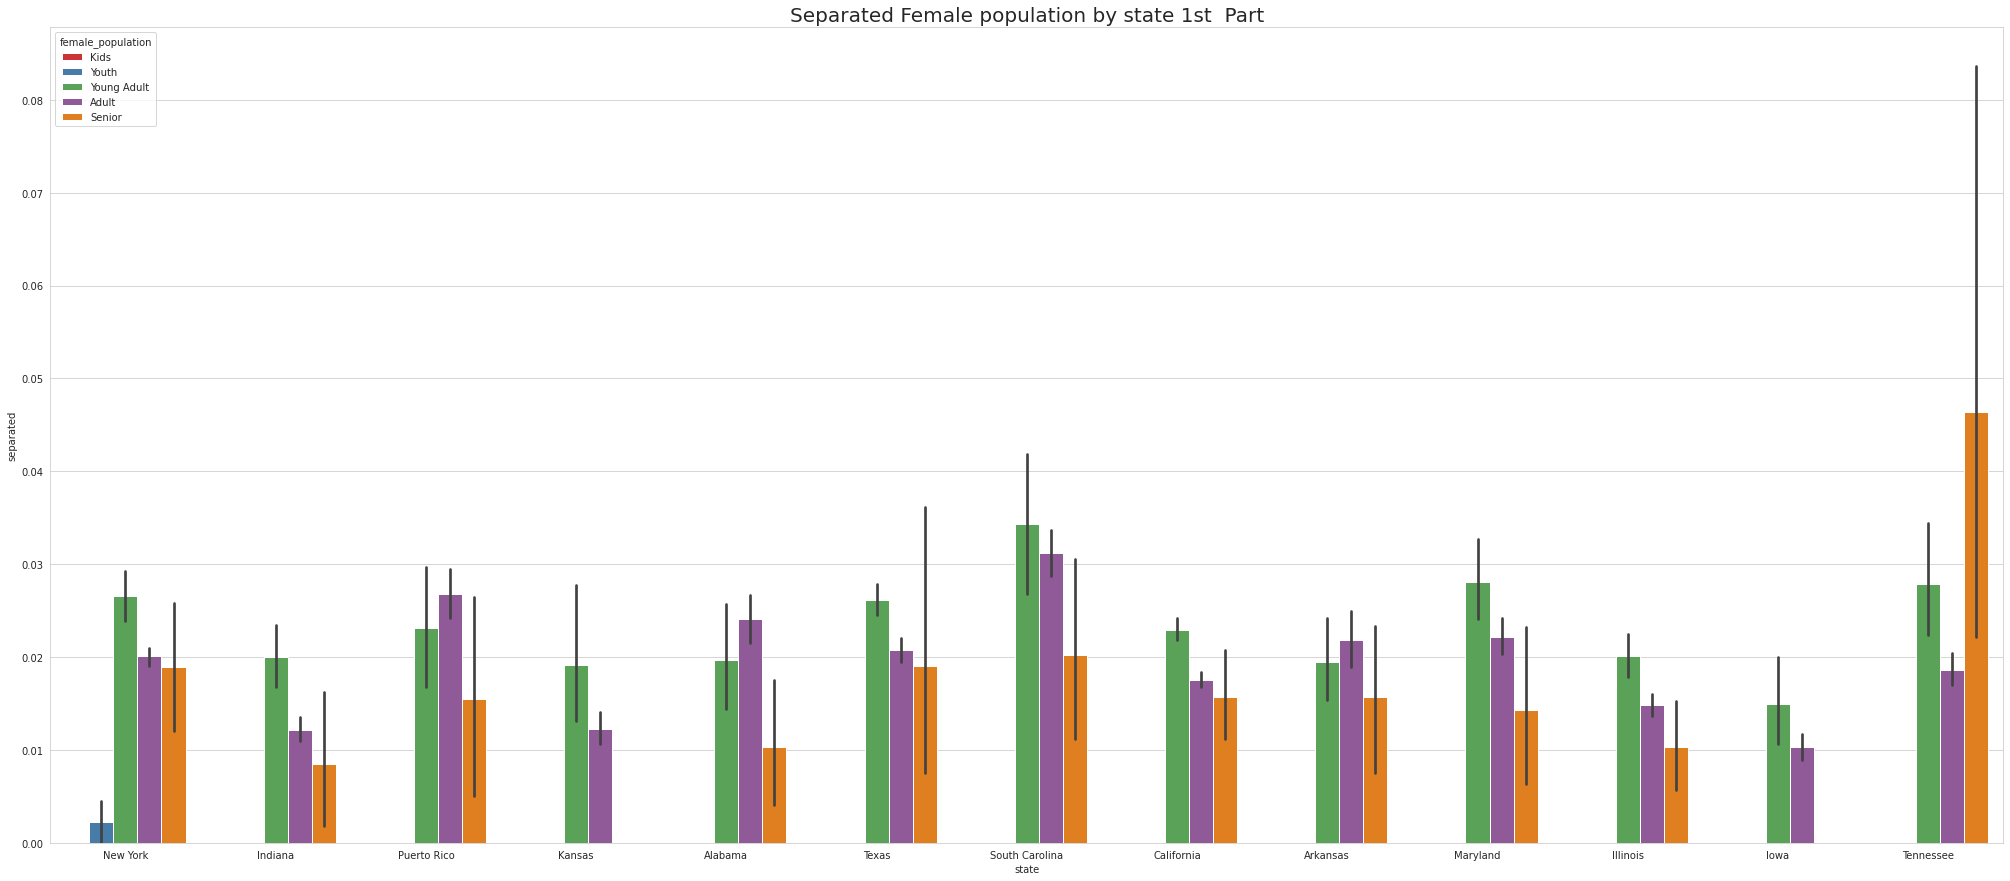

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='female_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Separated Female population by state 1st  Part', fontsize = 20)

plt.show()

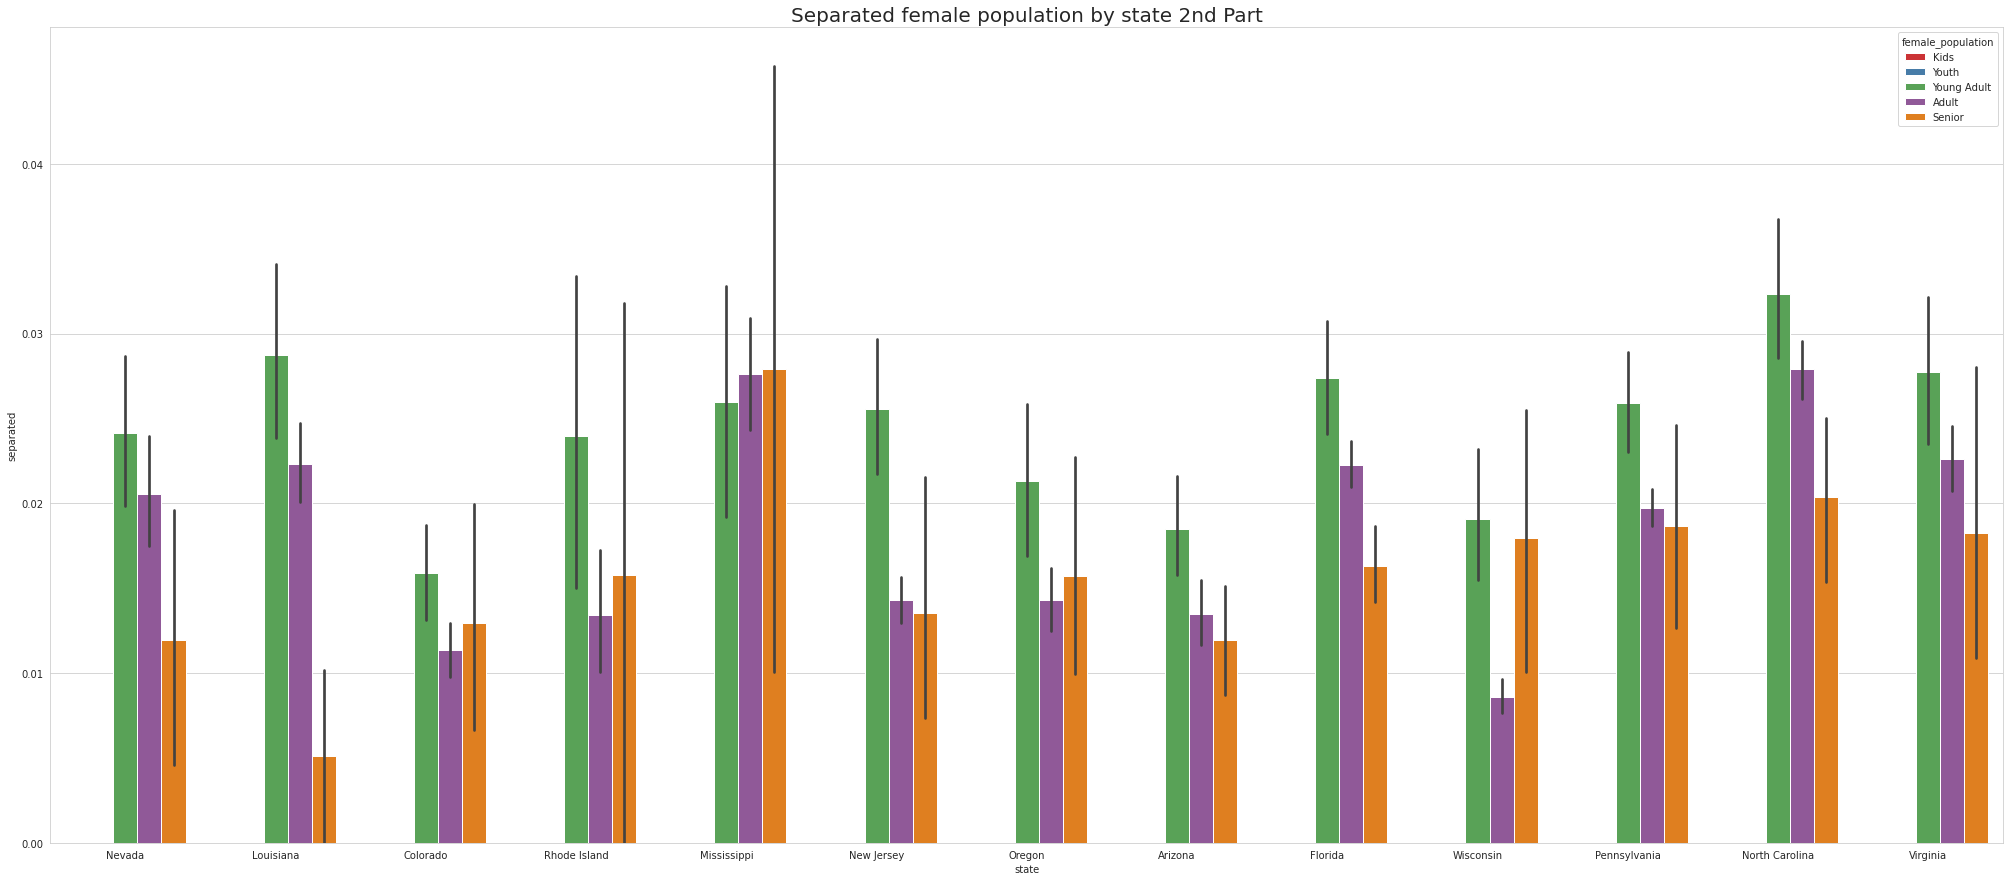

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='female_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Separated female population by state 2nd Part', fontsize = 20)

plt.show()

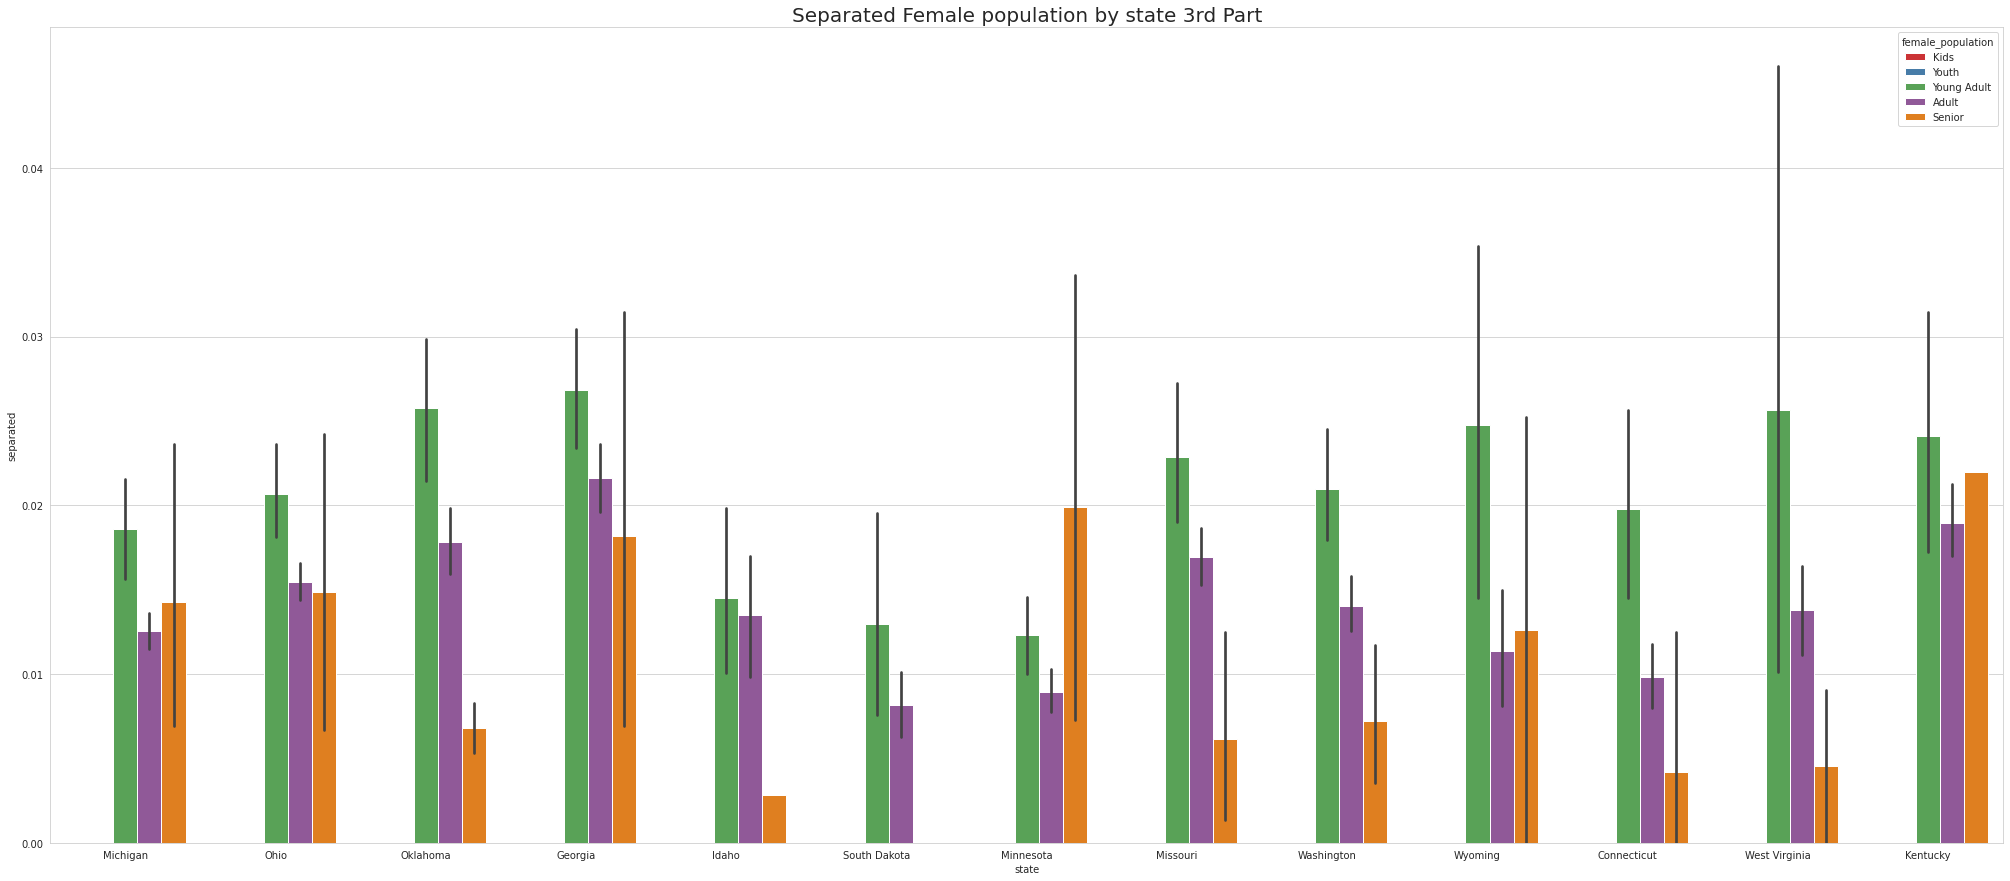

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='female_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Separated Female population by state 3rd Part', fontsize = 20)

plt.show()

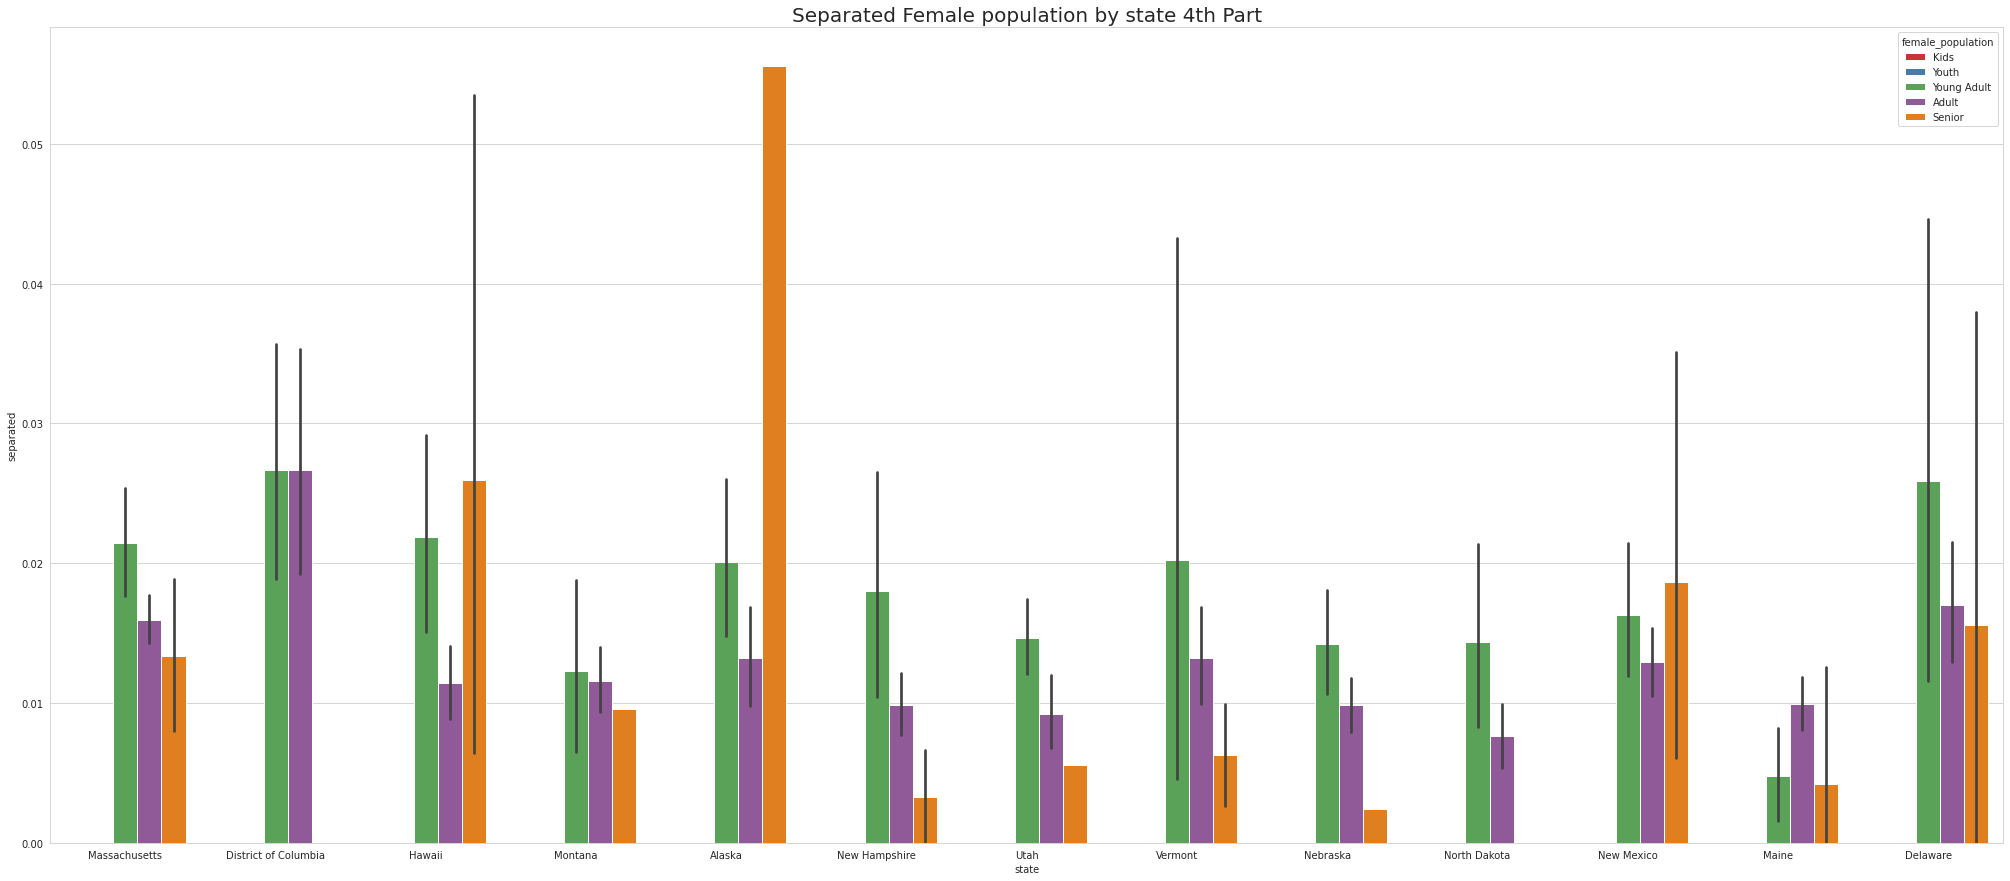

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='separated',hue='female_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Separated Female population by state 4th Part', fontsize = 20)

plt.show()


Except for Newyork, No other state has Separated Female Youth population Tennessee has the Highest Separated Female Senior population


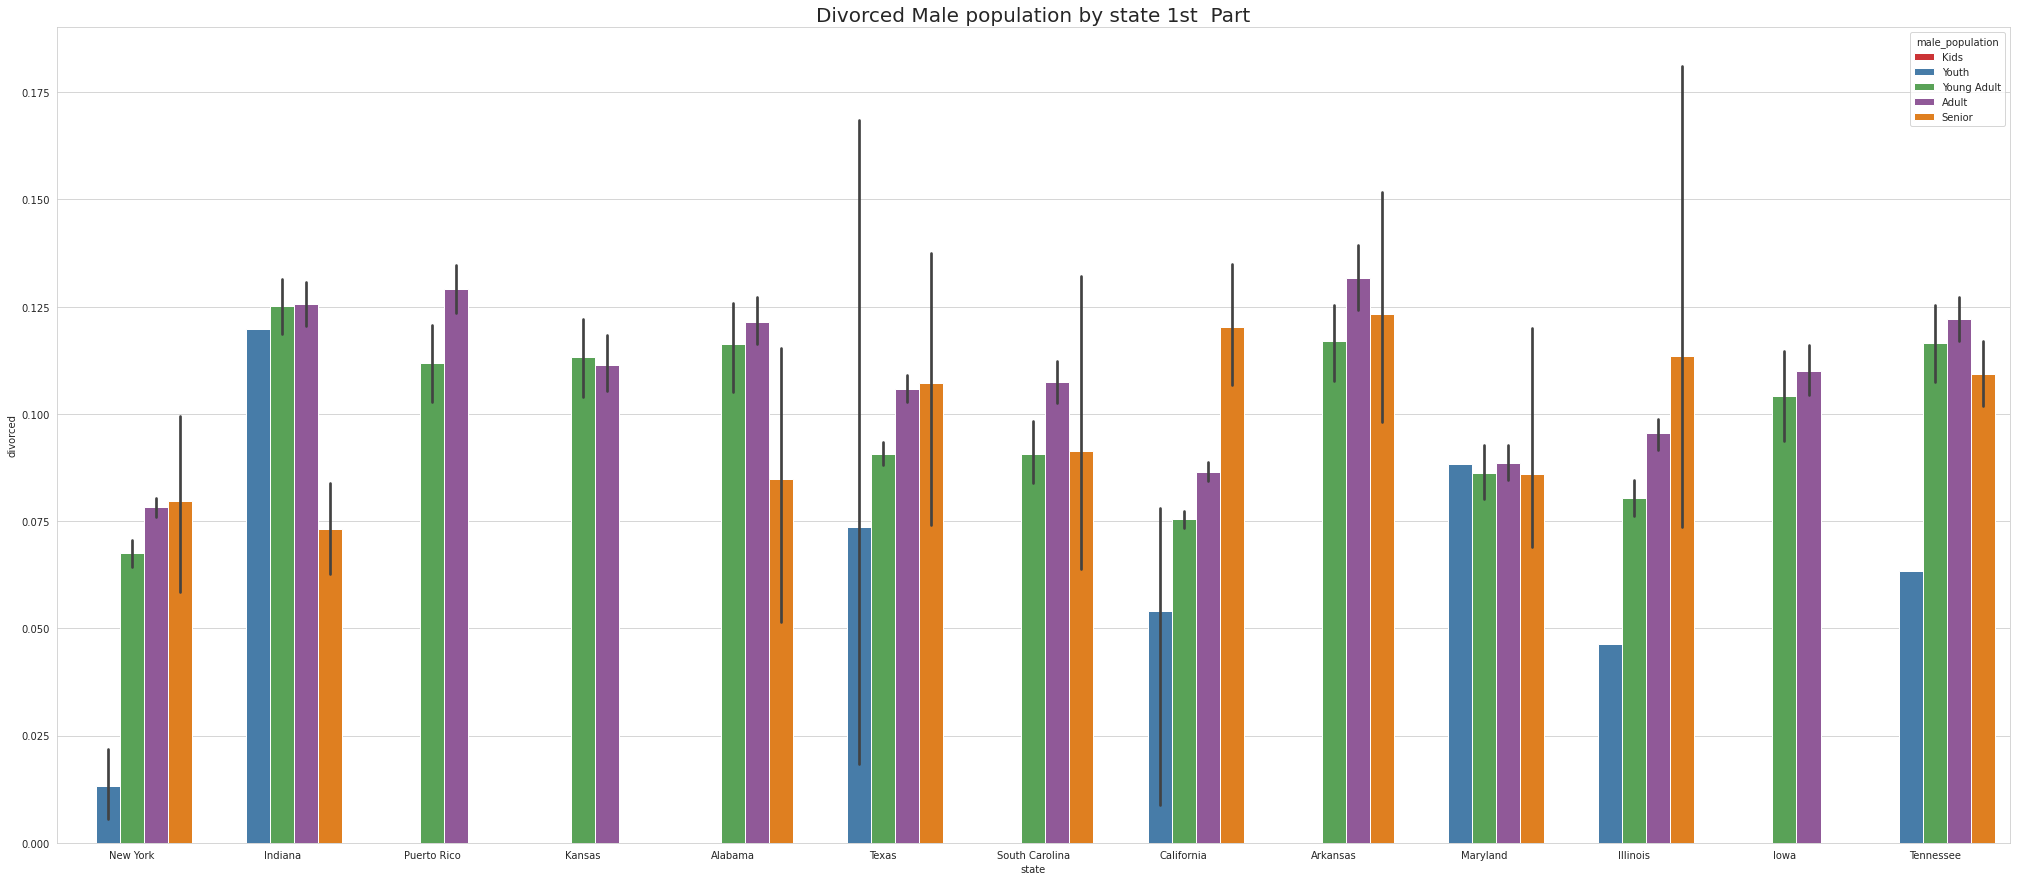

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='male_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Divorced Male population by state 1st  Part', fontsize = 20)

plt.show()

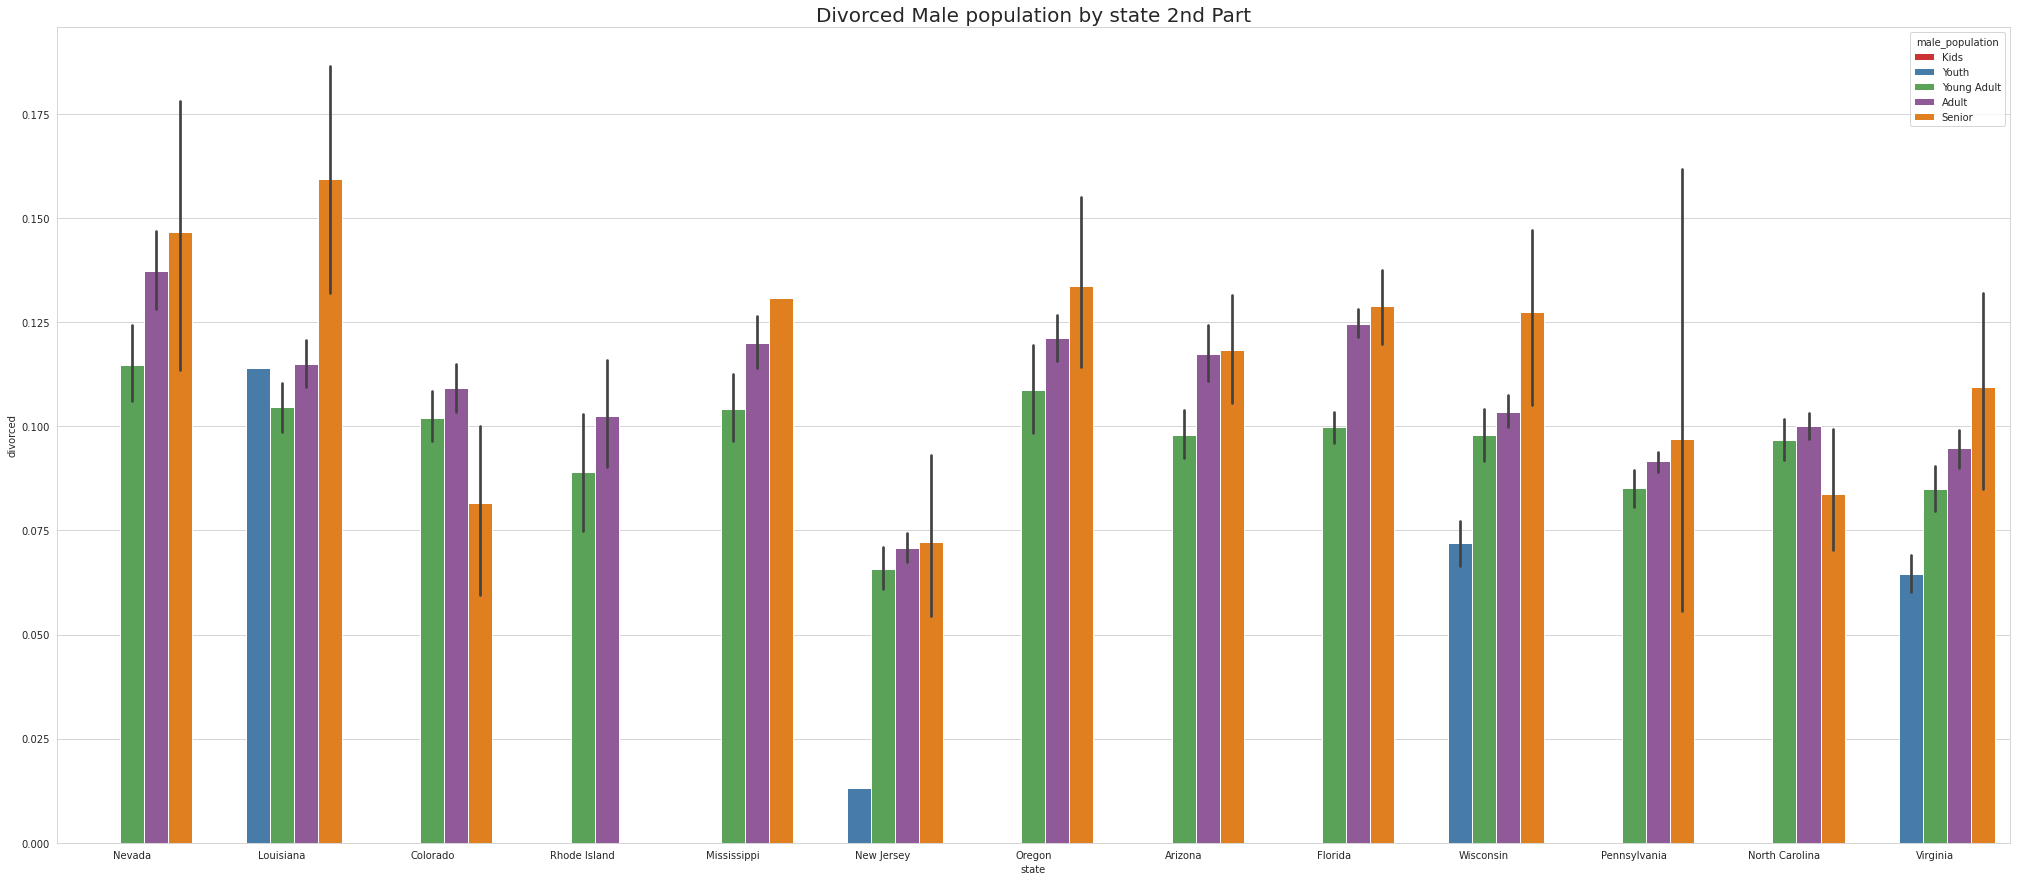

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='male_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Divorced Male population by state 2nd Part', fontsize = 20)

plt.show()

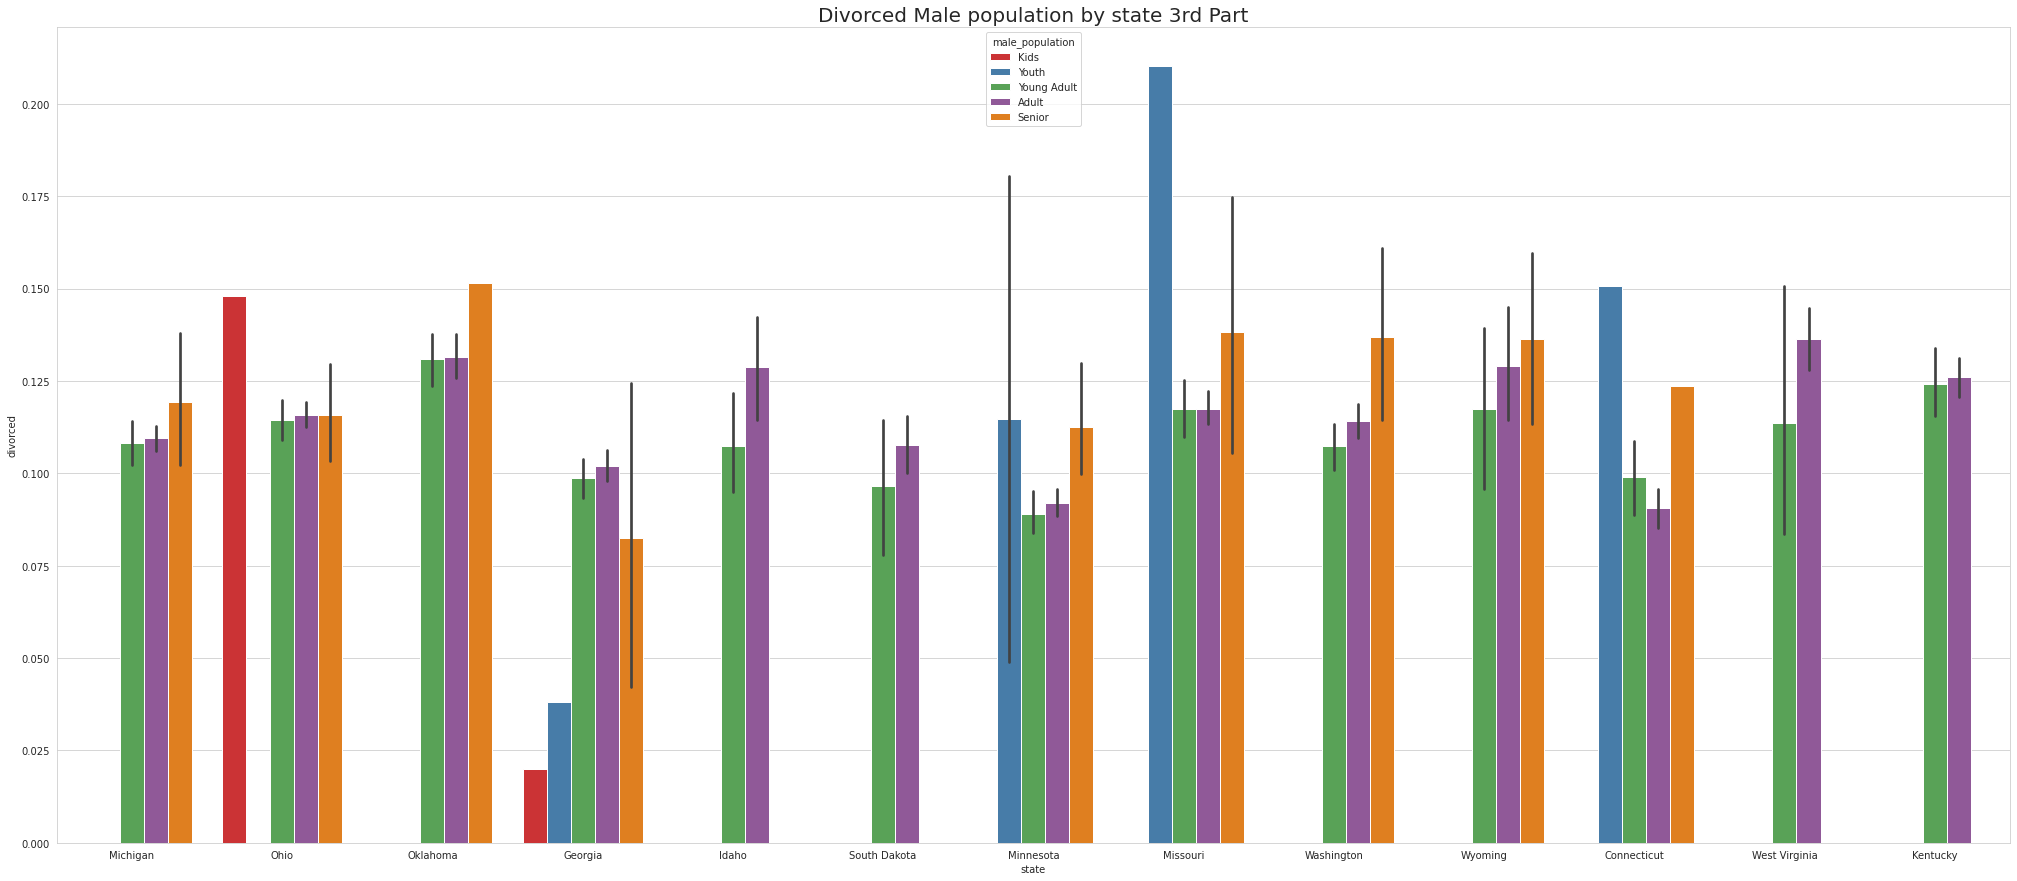

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='male_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Divorced Male population by state 3rd Part', fontsize = 20)

plt.show()

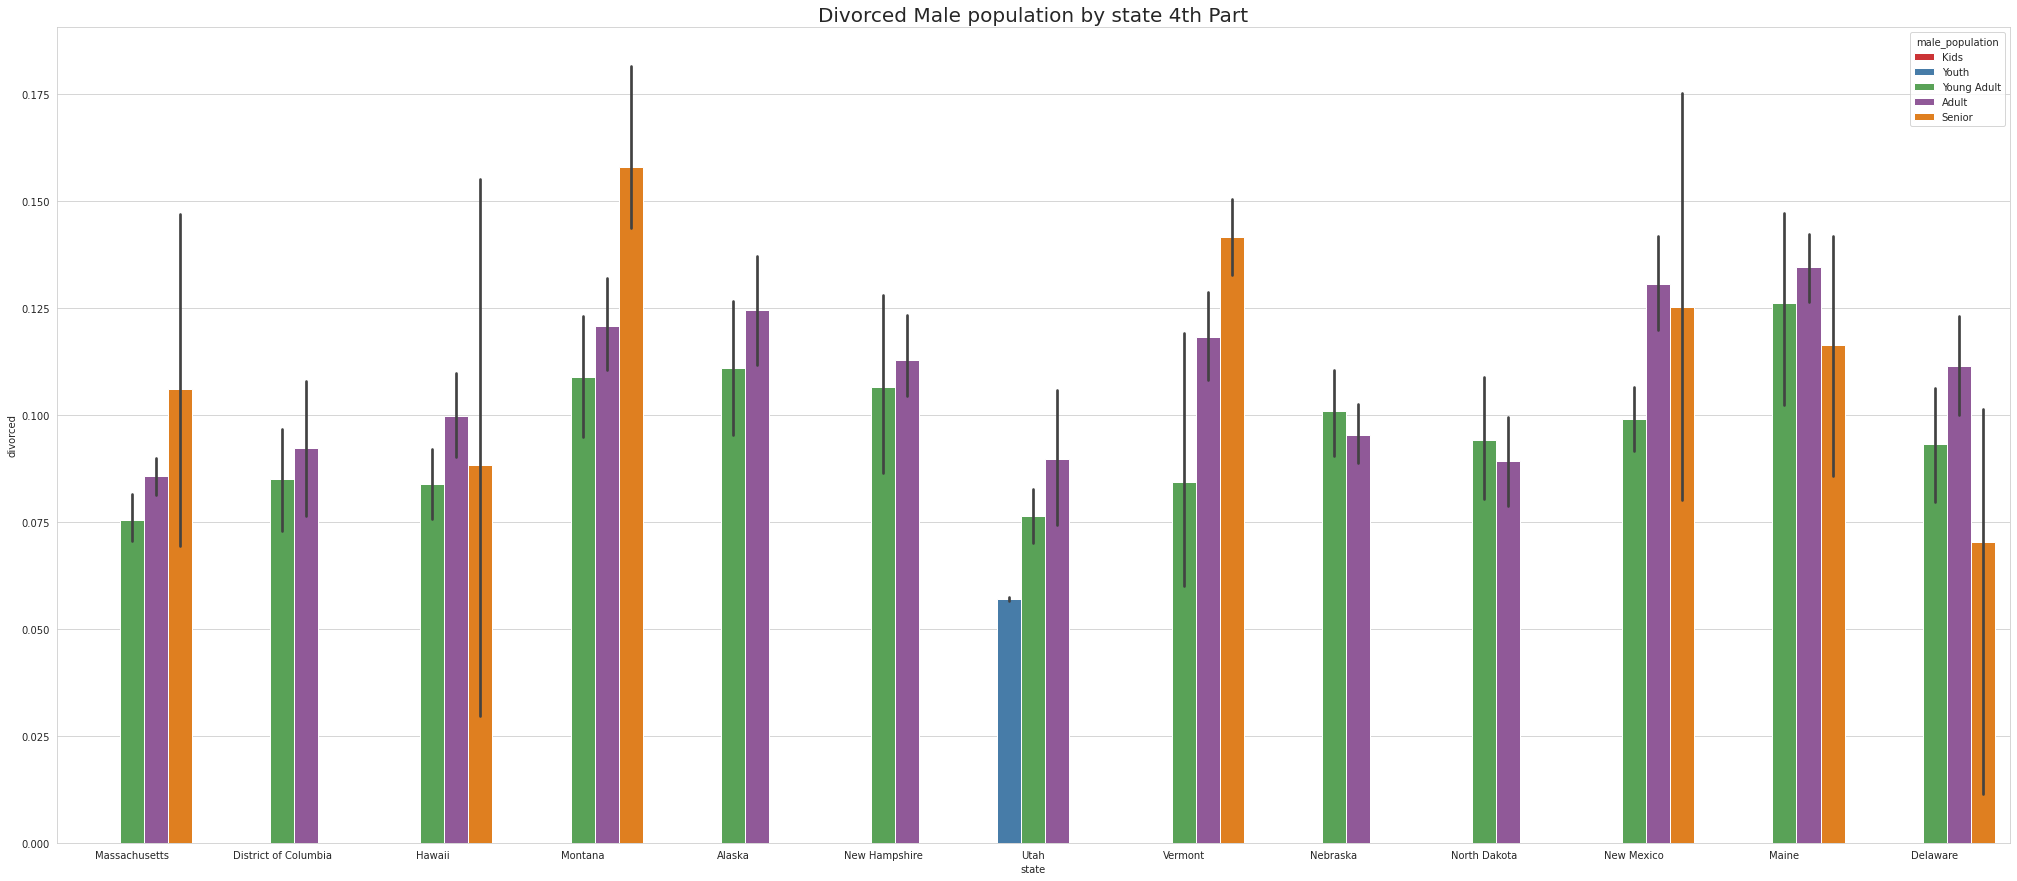

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='male_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Divorced Male population by state 4th Part', fontsize = 20)

plt.show()

"Ohio", has Largest number of Divorced Male KIDS.

"Missouri"&"Connecticut", has Largest number of Divorced Male YOUTH.

"Maine, Indiana & Oklahoma", has Largest number of Divorced Male YOUNG ADULTS

"Arkansas, Maine,Neveda ,Indiana & Oklahoma", has Largest number of Divorced Male ADULTS

"Louisiana","OKlahoma" & "Montana", has Largest number of Divorced Male SENIORS.

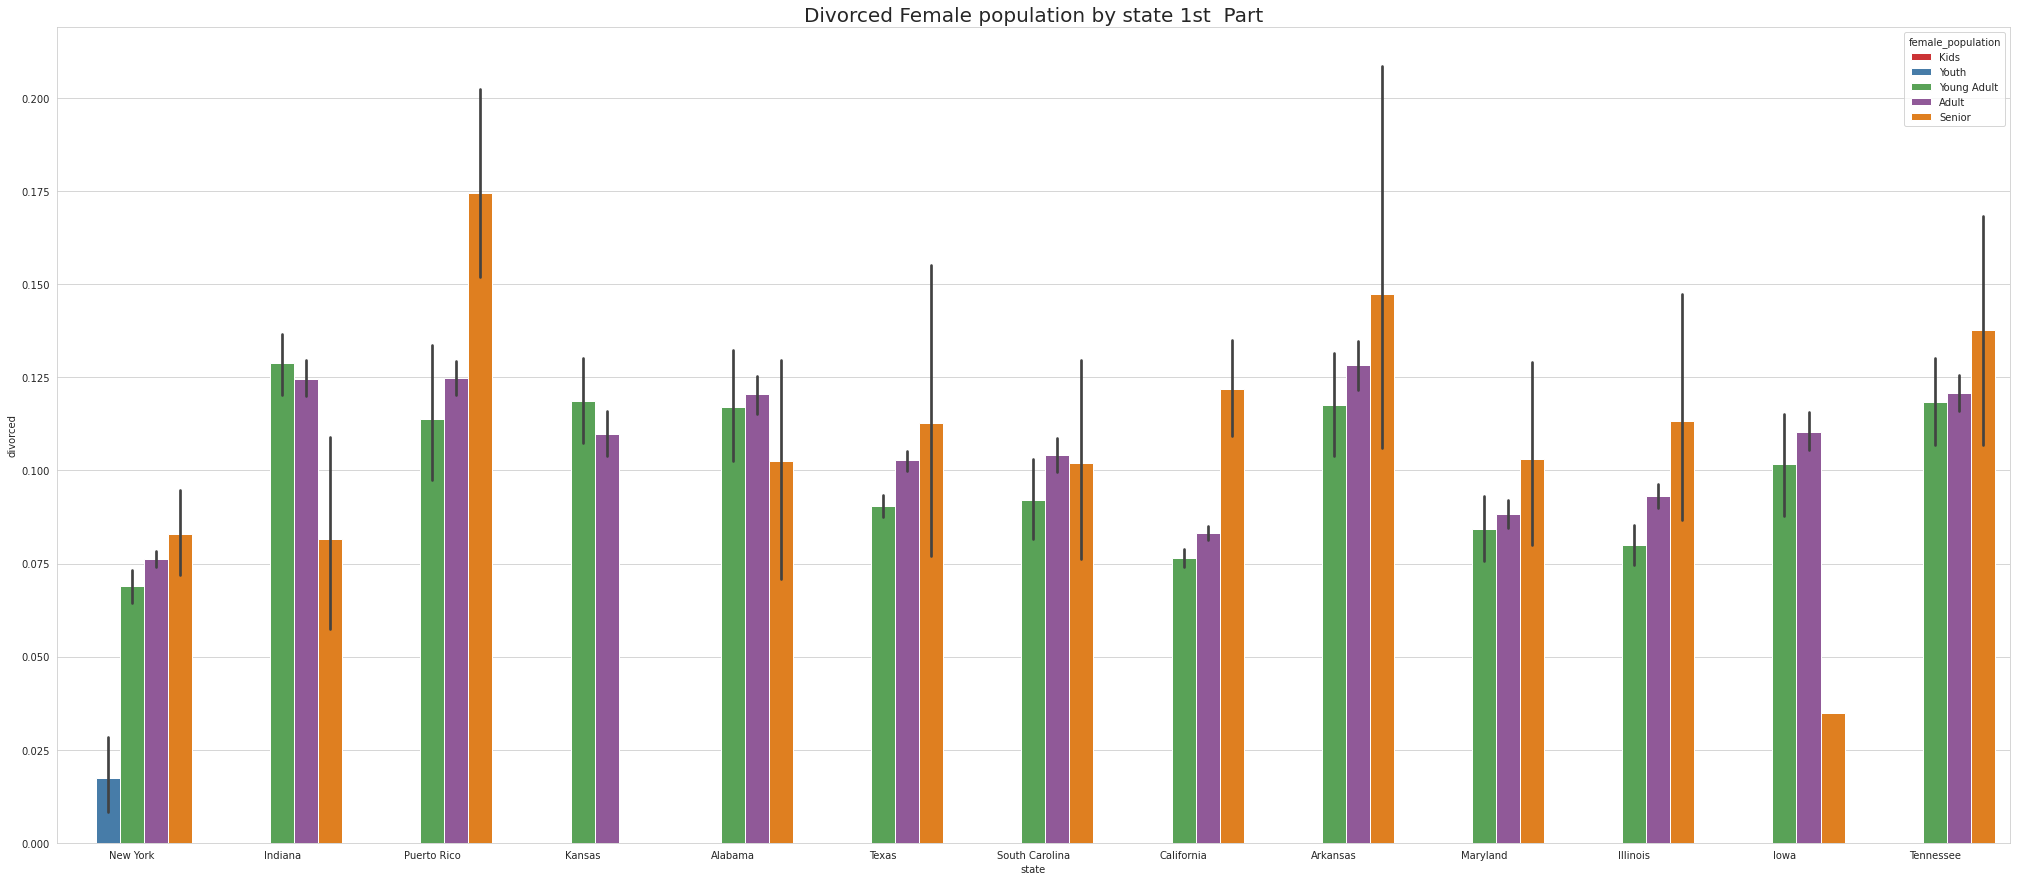

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='female_population',data=train,palette="Set1",order=['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas','South Carolina', 
       'California', 'Arkansas', 'Maryland', 'Illinois','Iowa', 'Tennessee',]).set_title('Divorced Female population by state 1st  Part', fontsize = 20)

plt.show()

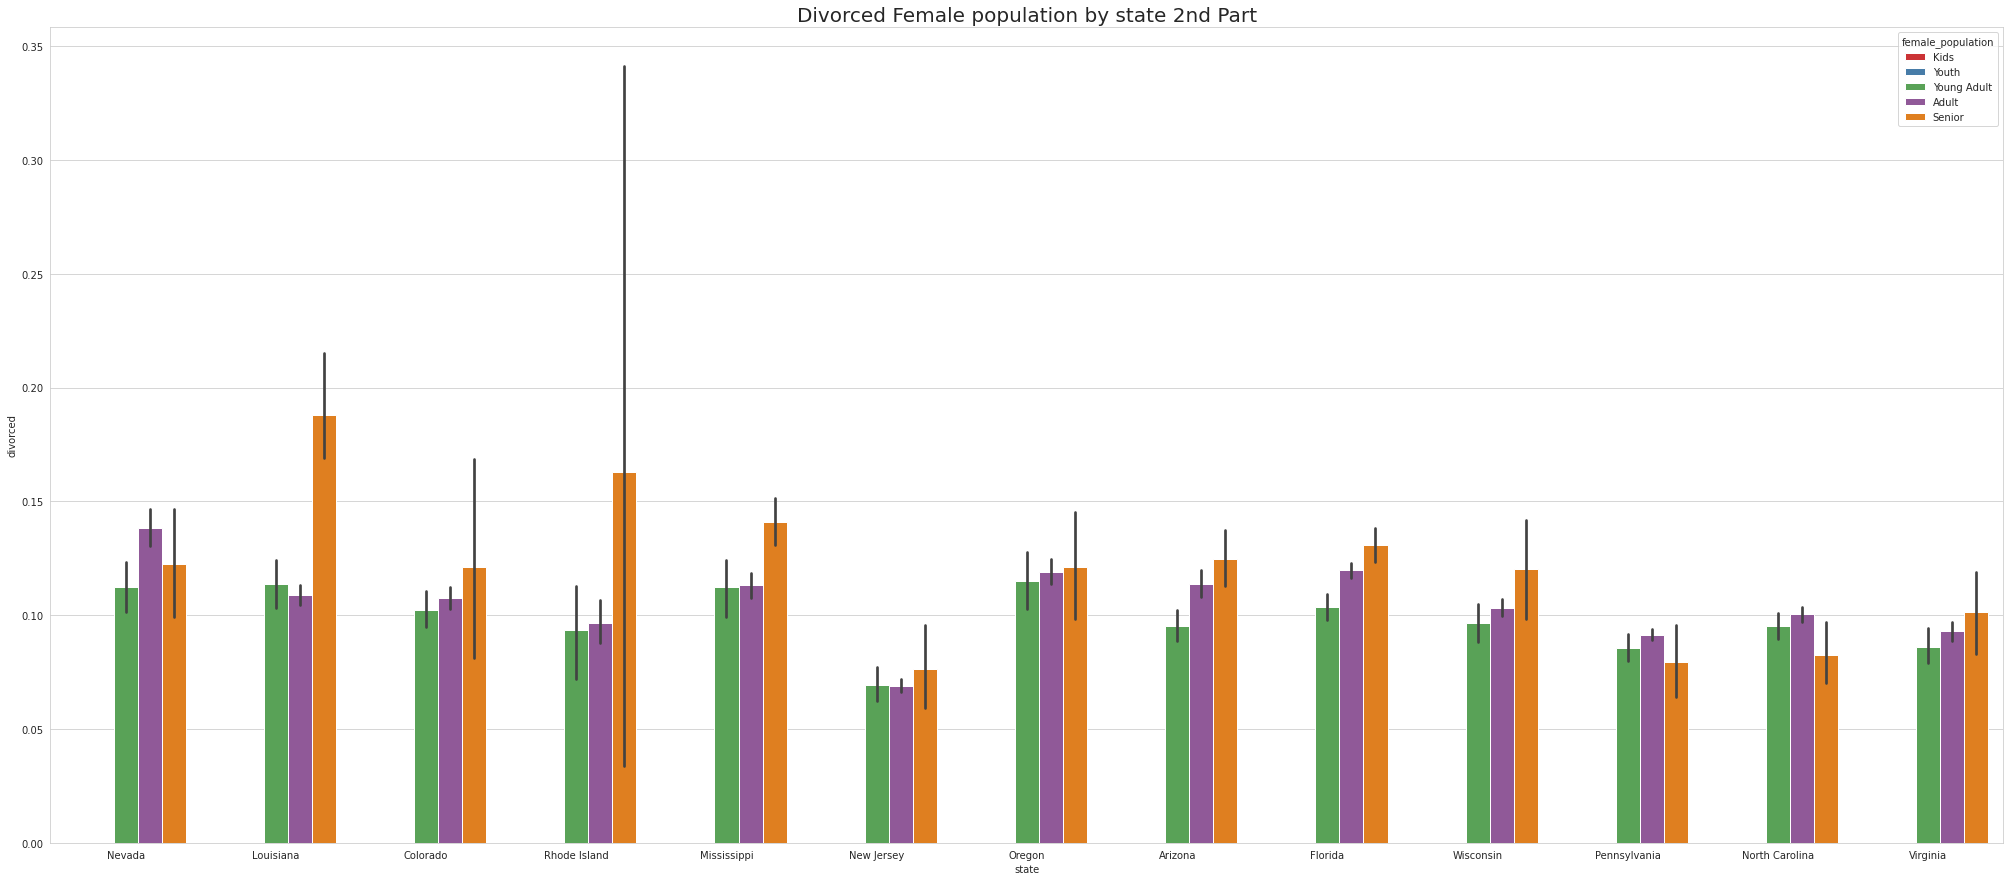

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='female_population',data=train,palette="Set1",order=['Nevada', 'Louisiana', 'Colorado','Rhode Island', 'Mississippi', 'New Jersey', 
       'Oregon', 'Arizona','Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina','Virginia']).set_title('Divorced Female population by state 2nd Part', fontsize = 20)

plt.show()

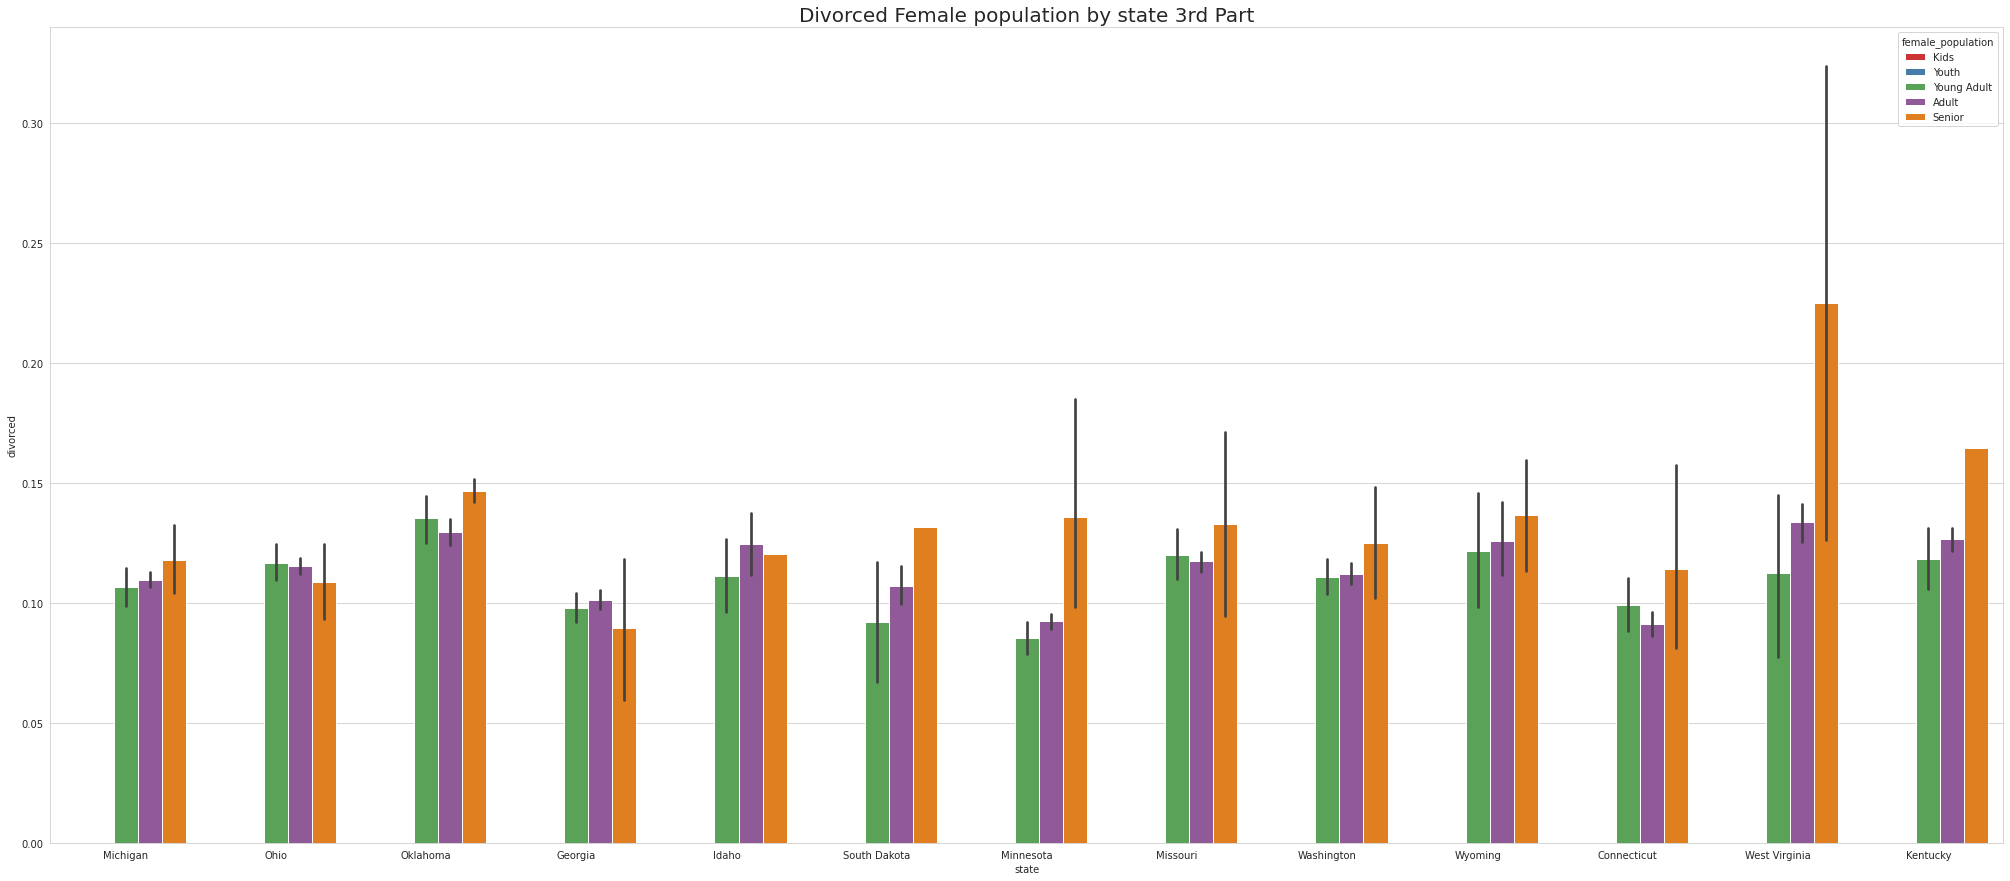

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='female_population',data=train,palette="Set1",order=['Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota',
           'Missouri', 'Washington', 'Wyoming', 'Connecticut', 'West Virginia', 'Kentucky']).set_title('Divorced Female population by state 3rd Part', fontsize = 20)

plt.show()

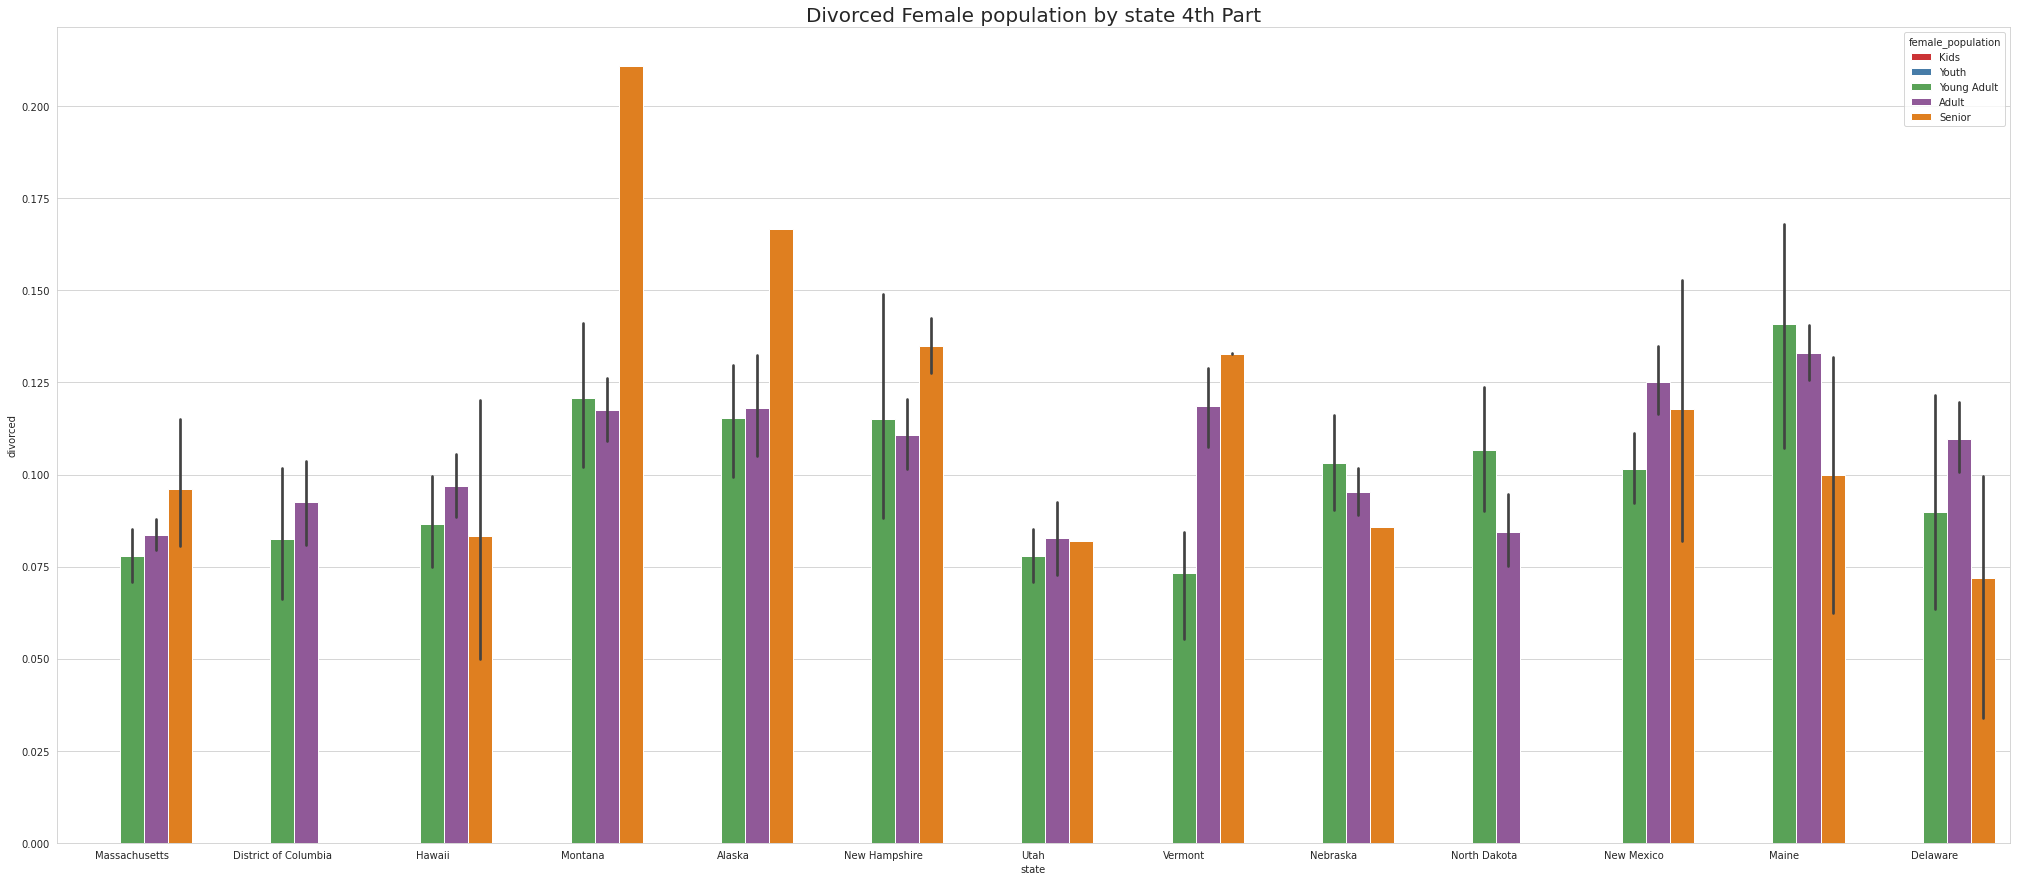

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(35,15))
sns.barplot(x='state',y='divorced',hue='female_population',data=train,palette="Set1",order=['Massachusetts', 'District of Columbia', 'Hawaii', 'Montana', 'Alaska',
           'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']).set_title('Divorced Female population by state 4th Part', fontsize = 20)

plt.show()

"Newyork", is the only state that has Divorced Female YOUTH.

"Maine", has Largest number of Divorced Female YOUNG ADULTS

"Maine", has Largest number of Divorced Female ADULTS

"Montana", has Largest number of Divorced Female SENIORS.

Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [ ]:
rent_income = train.groupby(by='state')['rent_mean'].agg(['mean'])
rent_income.head()

mean
state                  
Alabama      768.810406
Alaska      1173.830410
Arizona     1101.133798
Arkansas     715.367386
California  1479.363998

In [ ]:
family_income = train.groupby(by='state')['family_mean'].agg(['mean'])
family_income.head()

mean
state                   
Alabama     66814.665178
Alaska      92504.826703
Arizona     73546.551858
Arkansas    64046.416919
California  88438.468548

In [ ]:
rent_perc_of_income=round(rent_income['mean']/family_income['mean'],2)
rent_perc_of_income.head(10)

state
Alabama                 0.01
Alaska                  0.01
Arizona                 0.01
Arkansas                0.01
California              0.02
Colorado                0.01
Connecticut             0.01
Delaware                0.01
District of Columbia    0.01
Florida                 0.02
Name: mean, dtype: float64

In [ ]:
#overall level rent as a percentage of income
round(sum(train['rent_mean'])/sum(train['family_mean'])*100,2)

1.33

Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [ ]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [ ]:
train.corr()

COUNTYID   STATEID  zip_code  area_code  \
COUNTYID                     1.000000  0.223287  0.036425   0.067072   
STATEID                      0.223287  1.000000 -0.256752   0.041526   
zip_code                     0.036425 -0.256752  1.000000  -0.005795   
area_code                    0.067072  0.041526 -0.005795   1.000000   
lat                         -0.151533  0.113640 -0.066621  -0.125661   
lng                          0.070043  0.315076 -0.927256  -0.012333   
ALand                        0.016090 -0.016735  0.073090   0.016342   
AWater                       0.017031 -0.026702  0.032090   0.022635   
pop                         -0.000569 -0.033485  0.080324   0.032716   
male_pop                    -0.000045 -0.035321  0.097659   0.035495   
female_pop                  -0.001064 -0.030731  0.061090   0.029063   
rent_mean                   -0.101025 -0.218888  0.072191   0.043070   
rent_median                 -0.098807 -0.213287  0.065121   0.043159   
rent_stdev                  -0.093382 -0.161816  0.038962   0.007007   
rent_sample_weight           0.048407  0.055482  0.036003  -0.046464   
rent_samples                -0.004591 -0.055277  0.071796  -0.026024   
rent_gt_10                  -0.012977 -0.049668 -0.007010   0.028616   
rent_gt_15                  -0.028583 -0.093912  0.001015   0.028971   
rent_gt_20                  -0.027498 -0.097669 -0.008332   0.023347   
rent_gt_25                  -0.019562 -0.097030 -0.012694   0.016971   
rent_gt_30                  -0.013346 -0.093942 -0.013553   0.021730   
rent_gt_35                  -0.011231 -0.088322 -0.019356   0.012082   
rent_gt_40                  -0.012661 -0.082602 -0.026066   0.008261   
rent_gt_50                  -0.017261 -0.069986 -0.035668  -0.003806   
universe_samples            -0.002112 -0.043719  0.066434  -0.024660   
used_samples                -0.005648 -0.055833  0.074013  -0.025234   
hi_mean                     -0.081554 -0.088322  0.001854   0.017577   
hi_median                   -0.079876 -0.077650  0.002074   0.021174   
hi_stdev                    -0.078903 -0.106192 -0.007979   0.001709   
hi_sample_weight             0.033864  0.033457  0.018502  -0.011039   
hi_samples                  -0.003445 -0.000826  0.021548  -0.003494   
family_mean                 -0.078593 -0.073768 -0.024399   0.001511   
family_median               -0.076669 -0.063696 -0.027873   0.001361   
family_stdev                -0.065202 -0.098698 -0.011084  -0.004660   
family_sample_weight         0.038421  0.023716  0.060018   0.034203   
family_samples              -0.000958 -0.001674  0.044422   0.034822   
hc_mortgage_mean            -0.140820 -0.168790 -0.017347   0.043388   
hc_mortgage_median          -0.138465 -0.164789 -0.014659   0.041269   
hc_mortgage_stdev           -0.123860 -0.164438 -0.017293   0.038626   
hc_mortgage_sample_weight    0.039519  0.052420 -0.015256  -0.018005   
hc_mortgage_samples         -0.025001 -0.020214  0.003119   0.016052   
hc_mean                     -0.093181 -0.015292 -0.219464   0.033448   
hc_median                   -0.092821 -0.007497 -0.222153   0.033897   
hc_stdev                    -0.056453 -0.060218 -0.093055   0.026035   
hc_samples                   0.039904  0.113807 -0.061711   0.004379   
hc_sample_weight             0.055392  0.111858 -0.017305  -0.000298   
home_equity_second_mortgage -0.041053 -0.112604  0.083010   0.005227   
second_mortgage             -0.050552 -0.124951  0.077754   0.003852   
home_equity                 -0.137030 -0.153831 -0.079424  -0.002090   
debt                        -0.089218 -0.167687  0.060807   0.014255   
second_mortgage_cdf          0.060584  0.121704 -0.061424   0.002720   
home_equity_cdf              0.150341  0.162447  0.087225   0.010127   
debt_cdf                     0.084777  0.164158 -0.071669  -0.022758   
hs_degree                   -0.068022  0.014217 -0.083918  -0.028772   
hs_degree_male              -0.064961  0.004236 -0.066084  -0.022153 

In [ ]:
correlation=train[['COUNTYID','STATEID','zip_code','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
           'median_age','pct_own', 'married','separated', 'divorced']].corr()

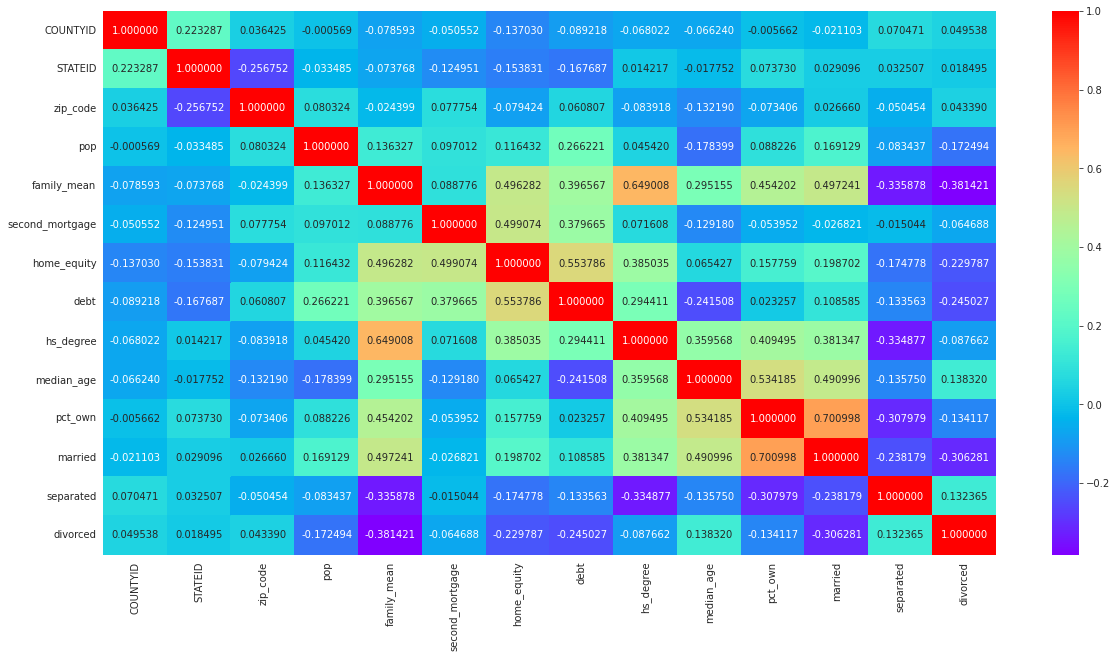

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True, fmt='f',  cmap=plt.cm.rainbow)

High positive correaltion is noticed between pop, male_pop and female_pop

High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean



#Project Task: Week 3

#Data Pre-processing:

The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
def numerical_variable(data):
  numerical_variable = list(data.select_dtypes(include = ['int', 'float']).columns)
  return numerical_variable

In [ ]:
numerical_variable(train)

['COUNTYID',
 'STATEID',
 'zip_code',
 'area_code',
 'lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weig

In [ ]:
n_train = train[numerical_variable(train)]

In [ ]:
n_train.isnull().any().sum()

0

In [ ]:
n_train.head()

COUNTYID  STATEID  zip_code  area_code        lat        lng  \
UID                                                                    
267822        53       36     13346        315  42.840812 -75.501524   
246444       141       18     46616        574  41.701441 -86.266614   
245683        63       18     46122        317  39.792202 -86.515246   
279653       127       72       927        787  18.396103 -66.104169   
247218       161       20     66502        785  39.195573 -96.569366   

              ALand   AWater   pop  male_pop  female_pop  rent_mean  \
UID                                                                   
267822  202183361.0  1699120  5230      2612        2618  769.38638   
246444    1560828.0   100363  2633      1349        1284  804.87924   
245683   69561595.0   284193  6881      3643        3238  742.77365   
279653    1105793.0        0  2700      1141        1559  803.42018   
247218    2554403.0        0  5637      2586        3051  938.56493   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
UID                                                                             
267822        784.0   232.63967           272.34441         362.0     0.86761   
246444        848.0   253.46747           312.58622         513.0     0.97410   
245683        703.0   323.39011           291.85520         378.0     0.95238   
279653        782.0   297.39258           259.30316         368.0     0.94693   
247218        881.0   392.44096          1005.42886        1704.0     0.99286   

        rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  \
UID                                                                  
267822     0.79155     0.59155     0.45634     0.42817     0.18592   
246444     0.93227     0.69920     0.69920     0.55179     0.41235   
245683     0.88624     0.79630     0.66667     0.39153     0.39153   
279653     0.87151     0.69832     0.61732     0.51397     0.46927   
247218     0.98247     0.91688     0.84740     0.78247     0.60974   

        rent_gt_40  rent_gt_50  universe_samples  used_samples      hi_mean  \
UID                                                                           
267822     0.15493     0.12958               387           355  63125.28406   
246444     0.39044     0.27888               542           502  41931.92593   
245683     0.28307     0.15873               459           378  84942.68317   
279653     0.35754     0.32961               438           358  48733.67116   
247218     0.55455     0.44416              1725          1540  31834.15466   

        hi_median     hi_stdev  hi_sample_weight  hi_samples  family_mean  \
UID                                                                         
267822    48120.0  49042.01206        1290.96240      2024.0  67994.14790   
246444    35186.0  31639.50203         838.74664      1127.0  50670.10337   
245683    74964.0  56811.62186        1155.20980      2488.0  95262.51431   
279653    37845.0  45100.54010         928.32193      1267.0  56401.68133   
247218    22497.0  34046.50907        1548.67477      1983.0  54053.42396   

        family_median  family_stdev  family_sample_weight  family_samples  \
UID                                                                         
267822        53245.0   47667.30119             884.33516          1491.0   
246444        43023.0   34715.57548             375.28798           554.0   
245683        85395.0   49292.67664             709.74925          1889.0   
279653        44399.0   41082.90515             490.18479           729.0   
247218        50272.0   39609.12605             244.08903           395.0   

        hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
UID                                                               
267822        1414.80295              1223.0          641.22898   
246444         864.41390               784.0          482.27020   
245683        1506.06758              1361.0

In [ ]:
n_train.columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', '

In [ ]:
#exculde columns 
n_train.drop(columns=['COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat','lng','remaining_income', 'pop_density', 'median_age'],inplace=True)

In [ ]:
n_train.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  \
UID                                                                   
267822  202183361.0  1699120  5230      2612        2618  769.38638   
246444    1560828.0   100363  2633      1349        1284  804.87924   
245683   69561595.0   284193  6881      3643        3238  742.77365   
279653    1105793.0        0  2700      1141        1559  803.42018   
247218    2554403.0        0  5637      2586        3051  938.56493   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
UID                                                                             
267822        784.0   232.63967           272.34441         362.0     0.86761   
246444        848.0   253.46747           312.58622         513.0     0.97410   
245683        703.0   323.39011           291.85520         378.0     0.95238   
279653        782.0   297.39258           259.30316         368.0     0.94693   
247218        881.0   392.44096          1005.42886        1704.0     0.99286   

        rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  \
UID                                                                  
267822     0.79155     0.59155     0.45634     0.42817     0.18592   
246444     0.93227     0.69920     0.69920     0.55179     0.41235   
245683     0.88624     0.79630     0.66667     0.39153     0.39153   
279653     0.87151     0.69832     0.61732     0.51397     0.46927   
247218     0.98247     0.91688     0.84740     0.78247     0.60974   

        rent_gt_40  rent_gt_50  universe_samples  used_samples      hi_mean  \
UID                                                                           
267822     0.15493     0.12958               387           355  63125.28406   
246444     0.39044     0.27888               542           502  41931.92593   
245683     0.28307     0.15873               459           378  84942.68317   
279653     0.35754     0.32961               438           358  48733.67116   
247218     0.55455     0.44416              1725          1540  31834.15466   

        hi_median     hi_stdev  hi_sample_weight  hi_samples  family_mean  \
UID                                                                         
267822    48120.0  49042.01206        1290.96240      2024.0  67994.14790   
246444    35186.0  31639.50203         838.74664      1127.0  50670.10337   
245683    74964.0  56811.62186        1155.20980      2488.0  95262.51431   
279653    37845.0  45100.54010         928.32193      1267.0  56401.68133   
247218    22497.0  34046.50907        1548.67477      1983.0  54053.42396   

        family_median  family_stdev  family_sample_weight  family_samples  \
UID                                                                         
267822        53245.0   47667.30119             884.33516          1491.0   
246444        43023.0   34715.57548             375.28798           554.0   
245683        85395.0   49292.67664             709.74925          1889.0   
279653        44399.0   41082.90515             490.18479           729.0   
247218        50272.0   39609.12605             244.08903           395.0   

        hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
UID                                                               
267822        1414.80295              1223.0          641.22898   
246444         864.41390               784.0          482.27020   
245683        1506.06758              1361.0          731.89394   
279653        1175.28642              1101.0          428.98751   
247218        1192.58759              1125.0          327.49674   

        hc_mortgage_sample_weight  hc_mortgage_samples    hc_mean  hc_median  \
UID                                                                            
267822                  377.83135                867.0  570.01530      558.0   
246444                  316.88320                356.0  351.98293      336.0   
245683                  699.41354

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(n_train)
chi_square_value, p_value

(9045268.678767936, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(n_train)

In [ ]:
kmo_model

0.21258179885097275

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=5,rotation=None)
fa.fit(n_train)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.57678238e+01,  1.22155718e+01,  8.26250989e+00,  4.58172663e+00,
        3.97519378e+00,  3.01600413e+00,  2.06024698e+00,  1.46559774e+00,
        1.34374021e+00,  1.25431970e+00,  1.12745750e+00,  9.61855242e-01,
        9.26584195e-01,  8.09338082e-01,  7.46960817e-01,  6.50289807e-01,
        5.85096676e-01,  5.67000356e-01,  5.19034761e-01,  4.59746569e-01,
        4.24790777e-01,  3.83072967e-01,  3.54797876e-01,  3.13372295e-01,
        3.04908411e-01,  2.55646006e-01,  2.44373229e-01,  2.37250283e-01,
        2.06382996e-01,  2.01625607e-01,  1.86066850e-01,  1.72524346e-01,
        1.52798366e-01,  1.41654101e-01,  1.32787334e-01,  1.16981644e-01,
        1.08400630e-01,  9.83265800e-02,  9.44036830e-02,  9.13910484e-02,
        8.98417270e-02,  5.82959043e-02,  5.07010306e-02,  4.11974098e-02,
        3.36265157e-02,  3.24731122e-02,  2.72260565e-02,  2.23657590e-02,
        2.11101652e-02,  1.91414406e-02,  1.60759720e-02,  1.54707466e-02,
        1.43342261e-02,  

In [ ]:
load = fa.loadings_
load

array([[-4.27717069e-02, -4.54305642e-02, -1.13940778e-01,
        -3.91728198e-02,  4.37363770e-02],
       [-9.34046725e-03, -2.22582167e-02, -3.13959770e-02,
        -2.40646603e-02,  2.64331867e-02],
       [ 3.26432741e-01,  9.28257809e-01, -6.46486643e-02,
         3.89795024e-02,  1.67045960e-02],
       [ 3.18069896e-01,  9.03287405e-01, -6.31368222e-02,
         1.99749779e-02,  1.38052827e-02],
       [ 3.23886932e-01,  9.21117943e-01, -6.37530960e-02,
         5.60007999e-02,  1.87912064e-02],
       [ 7.41500880e-01, -8.54214488e-02,  3.33649249e-01,
         1.48215432e-01,  7.70206888e-02],
       [ 6.99629295e-01, -7.87175578e-02,  3.24351275e-01,
         1.33998942e-01,  5.77966129e-02],
       [ 5.66798428e-01, -7.29982955e-02,  2.58285206e-01,
         1.55797194e-01,  2.06444816e-01],
       [-4.00621047e-01,  4.90599583e-01,  2.44292832e-01,
        -1.99468978e-01,  2.83430997e-01],
       [-1.14653161e-01,  5.65887877e-01,  4.64443135e-01,
        -1.99537028e-01

In [ ]:
xv= range(1, n_train.shape[1]+1)

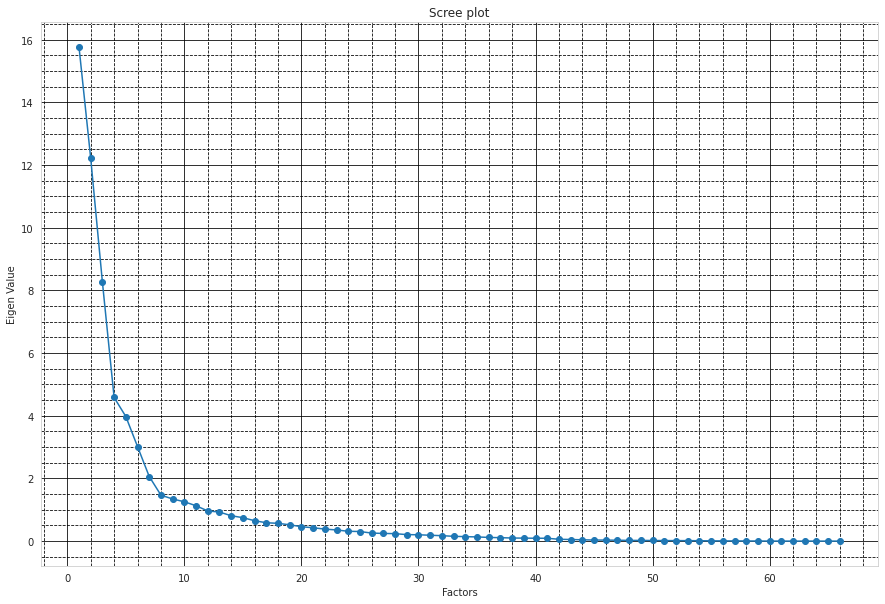

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(xv, ev)
plt.plot(xv, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'black', )
plt.grid(b=True, which='minor', color='black', linestyle='--')
plt.minorticks_on()
plt.show()

In [ ]:
Fa = pd.DataFrame.from_records(load)

Fa = Fa.add_prefix('Factor_Analysis')

Fa.index = n_train.columns
Fa

Factor_Analysis0  Factor_Analysis1  \
ALand                               -0.042772         -0.045431   
AWater                              -0.009340         -0.022258   
pop                                  0.326433          0.928258   
male_pop                             0.318070          0.903287   
female_pop                           0.323887          0.921118   
rent_mean                            0.741501         -0.085421   
rent_median                          0.699629         -0.078718   
rent_stdev                           0.566798         -0.072998   
rent_sample_weight                  -0.400621          0.490600   
rent_samples                        -0.114653          0.565888   
rent_gt_10                          -0.060809          0.116118   
rent_gt_15                          -0.116408          0.132923   
rent_gt_20                          -0.216003          0.119149   
rent_gt_25                          -0.278872          0.108861   
rent_gt_30                          -0.305016          0.097826   
rent_gt_35                          -0.300504          0.081432   
rent_gt_40                          -0.295100          0.069805   
rent_gt_50                          -0.272795          0.045826   
universe_samples                    -0.133086          0.584549   
used_samples                        -0.106589          0.567096   
hi_mean                              0.947841         -0.159917   
hi_median                            0.917103         -0.144633   
hi_stdev                             0.877202         -0.176299   
hi_sample_weight                    -0.180726          0.871852   
hi_samples                           0.333823          0.878480   
family_mean                          0.938851         -0.185771   
family_median                        0.912775         -0.182798   
family_stdev                         0.802677         -0.157215   
family_sample_weight                -0.139609          0.882047   
family_samples                       0.410609          0.834384   
hc_mortgage_mean                     0.793997         -0.147717   
hc_mortgage_median                   0.774752         -0.145422   
hc_mortgage_stdev                    0.685812         -0.150947   
hc_mortgage_sample_weight            0.128200          0.648192   
hc_mortgage_samples                  0.603190          0.602051   
hc_mean                              0.698106         -0.174559   
hc_median                            0.667483         -0.164370   
hc_stdev                             0.539020         -0.138556   
hc_samples                           0.110317          0.411056   
hc_sample_weight                    -0.099808          0.410976   
home_equity_second_mortgage          0.194110          0.095604   
second_mortgage                      0.214663          0.087472   
home_equity                          0.613748         -0.030978   
debt                                 0.512653          0.166535   
second_mortgage_cdf                 -0.327701         -0.094006   
home_equity_cdf                     -0.638704          0.021476   
debt_cdf                            -0.503665         -0.163804   
hs_degree                            0.656703         -0.132249   
hs_degree_male                       0.649292         -0.121211   
hs_degree_female                     0.621382         -0.134734   
male_age_mean                        0.231356         -0.319539   
male_age_median                      0.304484         -0.312753   
male_age_stdev                       0.046264         -0.127065   
male_age_sample_weight               0.265851          0.873754   
male_age_samples                     0.318070          0.903287   
female_age_mean                      0.169226         -0.299821   
female_age_median                    0.243087         -0.302677   
female_age_stdev                    -0.058052         -0.091341   
female_age_sample_weight             0.265620          0.888411   
female_ag

#  • Highschool graduation rates
                         • Median population age
                         • Second mortgage statistics
                         • Percent own
                         • Bad debt expense

In [ ]:
Fa_train = round(Fa.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 
'second_mortgage', 'second_mortgage_cdf', 'pct_own', 'bad_debt'], :], 2)

In [ ]:
def col_elements(value):

#Colors elements in a dateframe green if positive and red if negative


  if value < -0.5:
    color = 'red'
  elif value > 0.5:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [ ]:
Fa_train.style.applymap(col_elements)

#Project Task: Week 4

#Data Modeling :

Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
n_test = test[numerical_variable(test)]

In [ ]:
#exculde columns 
n_test.drop(columns=['COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat','lng','pop_density', 'median_age'],inplace=True)

In [ ]:
print(n_train.shape)
print(n_test.shape)

(26585, 66)
(11355, 66)


In [ ]:
n_train.columns

Index(['ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples',

In [ ]:
n_test.columns

Index(['ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples',

a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [ ]:
train_x = n_train.drop(columns=['hc_mortgage_mean'])
train_y = n_train['hc_mortgage_mean']

In [ ]:
test_x = n_test.drop(columns=['hc_mortgage_mean'])
test_y = n_test['hc_mortgage_mean']

In [ ]:
print(train_x.shape)
print(test_x.shape)

(26585, 65)
(11355, 65)


In [ ]:
Lr = LinearRegression()

In [ ]:
Lr.fit(train_x,train_y)

LinearRegression()

In [ ]:
predict= Lr.predict(test_x)
predict

array([1141.74980398, 1511.1676771 , 1222.02059301, ..., 1854.09448016,
       1157.18297104, 1387.37036565])

In [ ]:
mae = mean_absolute_error(test_y,predict)
mse = mean_squared_error(test_y,predict)
rmse = math.sqrt(mean_squared_error(test_y,predict))
r2 = r2_score(test_y,predict)
print(f"Mean Absolute Error:{round(mae,2)}")
print(f"Mean Squared Error:{round(mse,2)}")
print(f"Root Mean Squared Error:{round(rmse,2)}")
print(f"R2 Score:{round(r2,2)}")

Mean Absolute Error:43.67
Mean Squared Error:4673.49
Root Mean Squared Error:68.36
R2 Score:0.99


Regression Model with all dependent numeric variables at Nation level is giving R SQUARED metric of 99%. So skipping state level Regression Model

b) Run another model at State level. There are 52 states in USA

In [ ]:
s_train = train[numerical_variable(train)]
s_test =  test[numerical_variable(test)]

In [ ]:
s_train.drop(columns=['zip_code', 'area_code', 'lat','lng','remaining_income', 'pop_density', 'median_age'],inplace=True)
s_test.drop(columns=['zip_code', 'area_code', 'lat','lng','pop_density', 'median_age'],inplace=True)

In [ ]:
print(s_train.shape)
print(s_test.shape)

(26585, 68)
(11355, 68)


In [ ]:
state = s_train['STATEID'].unique()

In [ ]:
s_train['STATEID'].value_counts()

6     2826
48    1876
36    1683
12    1569
42    1203
17    1096
39    1074
26    1016
37     809
13     757
34     684
51     667
18     565
25     538
53     536
55     531
4      523
24     513
47     508
27     496
29     488
8      463
22     420
1      407
45     389
21     387
40     365
9      321
41     321
72     300
20     295
19     287
5      264
28     242
32     239
49     224
35     195
31     185
54     168
23     130
30     117
15     113
33     111
16     101
46      89
44      89
38      79
2       74
10      71
11      63
50      62
56      56
Name: STATEID, dtype: int64

In [ ]:
print(sorted(state))

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]


In [ ]:
s_train.columns

Index(['COUNTYID', 'STATEID', 'ALand', 'AWater', 'pop', 'male_pop',
       'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weigh

In [ ]:
feature_columns=['COUNTYID', 'STATEID', 'ALand', 'AWater', 'pop', 'male_pop',
       'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_median','hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples','hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight', 'female_age_samples',
       'pct_own', 'married', 'married_snp', 'separated', 'divorced',
       'bad_debt']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SC = StandardScaler()

In [ ]:
for i in [1,20,45]:
  print("STATEID -",i)
  s_train_x=s_train[s_train['COUNTYID']==i][feature_columns]
  s_train_y=s_train[s_train['COUNTYID']==i]['hc_mortgage_mean']
    
  s_test_x=s_test[s_test['COUNTYID']==i][feature_columns]
  s_test_y=s_test[s_test['COUNTYID']==i]['hc_mortgage_mean']
    
  s_train_scaled=SC.fit_transform(s_train_x)
  s_test_scaled=SC.fit_transform(s_test_x)

  Lr.fit(s_train_scaled,s_train_y)
  s_pred = Lr.predict(s_test_scaled)
  
  s_mae = mean_absolute_error(s_test_y,s_pred)
  s_mse = mean_squared_error(s_test_y,s_pred)
  s_rmse = math.sqrt(mean_squared_error(s_test_y,s_pred))
  s_r2 = r2_score(s_test_y,s_pred)

  print(f"Mean Absolute Error:{round(s_mae,2)}")
  print(f"Mean Squared Error:{round(s_mse,2)}")
  print(f"Root Mean Squared Error:{round(s_rmse,2)}")
  print(f"R2 Score:{round(s_r2,2)}")

STATEID - 1
Mean Absolute Error:11389503548.48
Mean Squared Error:2.0908859553935737e+20
Root Mean Squared Error:14459896110.95
R2 Score:-410429821366382.56
STATEID - 20
Mean Absolute Error:246.6
Mean Squared Error:84714.13
Root Mean Squared Error:291.06
R2 Score:0.63
STATEID - 45
Mean Absolute Error:8822908571370.76
Mean Squared Error:1.553802280528196e+26
Root Mean Squared Error:12465160570679.37
R2 Score:-6.443994385547235e+20


• Ensure Multi-collinearity does not exist in dependent variables

In [ ]:
corr_features = set()
corr_mat = n_train.drop('hc_mortgage_mean', axis=1).corr()

for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > 0.8:
            col_name = corr_mat.columns[i]
            corr_features.add(col_name)

In [ ]:
corr_features

{'bad_debt',
 'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [ ]:
corr_list = ['bad_debt','debt_cdf','family_mean','family_median','family_sample_weight','family_samples','family_stdev','female_age_mean','female_age_median','female_age_sample_weight',
 'female_age_samples','female_pop','hc_median','hc_mortgage_samples','hc_sample_weight','hi_median','hi_samples','hi_stdev','home_equity_cdf','hs_degree_female','hs_degree_male',
 'male_age_median','male_age_sample_weight','male_age_samples','male_pop','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50','rent_median','rent_samples',
 'second_mortgage','universe_samples','used_samples']

In [ ]:
n_train.drop(corr_list, axis=1, inplace=True)

In [ ]:
n_test.drop(corr_list, axis=1, inplace=True)

In [ ]:
print(n_train.shape, n_test.shape)

(26585, 31) (11355, 31)


#Dropped MultiCollinear variables and ran the Regression Model

In [ ]:
n_train.head()

ALand   AWater   pop  rent_mean  rent_stdev  rent_sample_weight  \
UID                                                                             
267822  202183361.0  1699120  5230  769.38638   232.63967           272.34441   
246444    1560828.0   100363  2633  804.87924   253.46747           312.58622   
245683   69561595.0   284193  6881  742.77365   323.39011           291.85520   
279653    1105793.0        0  2700  803.42018   297.39258           259.30316   
247218    2554403.0        0  5637  938.56493   392.44096          1005.42886   

        rent_gt_10  rent_gt_15  rent_gt_20      hi_mean  hi_sample_weight  \
UID                                                                         
267822     0.86761     0.79155     0.59155  63125.28406        1290.96240   
246444     0.97410     0.93227     0.69920  41931.92593         838.74664   
245683     0.95238     0.88624     0.79630  84942.68317        1155.20980   
279653     0.94693     0.87151     0.69832  48733.67116         928.32193   
247218     0.99286     0.98247     0.91688  31834.15466        1548.67477   

        hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
UID                                                               
267822        1414.80295              1223.0          641.22898   
246444         864.41390               784.0          482.27020   
245683        1506.06758              1361.0          731.89394   
279653        1175.28642              1101.0          428.98751   
247218        1192.58759              1125.0          327.49674   

        hc_mortgage_sample_weight    hc_mean   hc_stdev  hc_samples  \
UID                                                                   
267822                  377.83135  570.01530  270.11299       770.0   
246444                  316.88320  351.98293  125.40457       229.0   
245683                  699.41354  556.45986  184.42175       538.0   
279653                  261.28471  288.04047  185.55887       392.0   
247218                   76.61052  443.68855   76.12674       124.0   

        home_equity_second_mortgage  home_equity     debt  \
UID                                                         
267822                      0.01588      0.08919  0.52963   
246444                      0.02222      0.04274  0.60855   
245683                      0.00000      0.09512  0.73484   
279653                      0.01086      0.01086  0.52714   
247218                      0.05426      0.05426  0.51938   

        second_mortgage_cdf  hs_degree  male_age_mean  male_age_stdev  \
UID                                                                     
267822              0.43658    0.89288       42.48574        22.97306   
246444              0.42174    0.90487       34.84728        20.37452   
245683              1.00000    0.94288       39.38154        22.89769   
279653              0.53057    0.91500       48.64749        23.05968   
247218              0.18332    1.00000       26.07533        11.84399   

        female_age_stdev  pct_own  married  married_snp  separated  divorced  
UID                                                                           
267822          22.51276  0.79046  0.57851      0.01882    0.01240   0.08770  
246444          23.43353  0.52483  0.34886      0.01426    0.01426   0.09030  
245683          23.94119  0.85331  0.64745      0.02830    0.01607   0.10657  
279653          24.32015  0.65037  0.47257      0.02021    0.02021   0.10106  
247218          11.10484  0.13046  0.12356      0.00000    0.00000   0.03109

In [ ]:
train_X = n_train.drop(columns=['hc_mortgage_mean'])
train_Y = n_train['hc_mortgage_mean']

test_X = n_test.drop(columns=['hc_mortgage_mean'])
test_Y = n_test['hc_mortgage_mean']

In [ ]:
Lr.fit(train_X,train_Y)

LinearRegression()

In [ ]:
y_pred = Lr.predict(test_X)
y_pred

array([1146.05812417, 1511.21532648, 1224.05002978, ..., 1846.89314756,
       1166.22357821, 1388.02844867])

In [ ]:
n_mae = mean_absolute_error(test_Y,y_pred)
n_mse = mean_squared_error(test_Y,y_pred)
n_rmse = math.sqrt(mean_squared_error(test_Y,y_pred))
n_r2 = r2_score(test_Y,y_pred)
print(f"Mean Absolute Error:{round(n_mae,2)}")
print(f"Mean Squared Error:{round(n_mse,2)}")
print(f"Root Mean Squared Error:{round(n_rmse,2)}")
print(f"R2 Score:{round(n_r2,2)}")

Mean Absolute Error:44.0
Mean Squared Error:4787.23
Root Mean Squared Error:69.19
R2 Score:0.99



#We have achieved an R Squared value of 99% which is pretty close to 1


• Test if predicted variable is normally distributed

In [ ]:
residual = test_Y - y_pred
residual

UID
255504      -6.812644
252676      22.044554
276314      30.494590
248614     -78.423430
286865       8.275276
238666       4.135431
240174      11.796707
266241     -44.265031
224873     -49.241696
290904      38.112548
243894      39.372085
249869     -15.990594
252569     -11.469165
289758       6.883624
265375      -2.377305
282536      21.882346
291282      31.373245
228479      76.953234
234207       9.420985
221773      -9.871131
250775     -35.231303
221579      49.945929
282302      13.824565
224946     -15.516089
293442      12.370279
240520      62.051402
265215      40.940737
281686     -66.082313
285948     -36.556975
258792     -25.763980
220502     -45.105171
258985     -48.357005
273508     -49.776142
276405      33.678663
284366      -4.822987
224534     -98.769147
246101     -82.400449
240403     -33.719314
259449      19.412706
243106     -26.743362
275231     -91.634767
262923      42.691556
242365     -62.567103
263028      45.741530
266907     -83.067416
271383

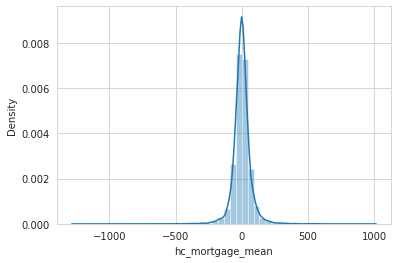

In [ ]:
sns.distplot(residual)

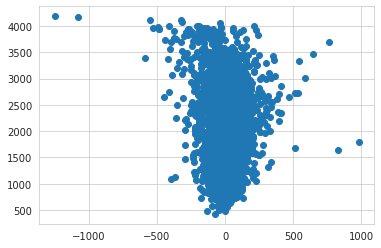

In [ ]:
# Same variance and residuals does not have correlation with predictor and Independance of residuals
plt.scatter(residual,y_pred)